Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS200.M21

PySpark - 21/04/2022

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1SIBcp2if0JI44iBytRhSIEytcJcnlcwe?usp=sharing)

# **Big Data - PySpark**

## Run PySpark on Google Colab

In [1]:
!pip install pyspark==3.0.1

     |████████████████████████████████| 204.2 MB 33 kB/s 
     |████████████████████████████████| 198 kB 47.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=9afaefdfb4c7eac23dd565d244d782343f7a9c32d073ec731016770d3e707b7b
  Stored in directory: /root/.cache/pip/wheels/5e/34/fa/b37b5cef503fc5148b478b2495043ba61b079120b7ff379f9b
Successfully built pyspark


In [2]:
import pyspark
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.getOrCreate()
df = spark.sql("select 'spark' as hello")

In [4]:
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



## Big Data Analytics with PySpark SQL

### Resilient Distributed Dataset (RDD)

#### Create SparkSession

In [5]:
import pyspark 
from pyspark.sql import SparkSession
spark.version

'3.0.1'

In [6]:
spark = SparkSession.builder.appName("VeryFirstSparkExample").getOrCreate()

In [7]:
spark.createDataFrame([("Java", "20000"), 
                       ("Python", "10000"), 
                       ("Scala", "5000")]).show()

+------+-----+
|    _1|   _2|
+------+-----+
|  Java|20000|
|Python|10000|
| Scala| 5000|
+------+-----+



#### Create RDD using sparkContext.parallelize()

In [8]:
# Create RDD from parallelize
data = [1,2,3,4,5,6,7,8,9,10,11,12]
rdd = spark.sparkContext.parallelize(data)

rdd.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [9]:
path = '/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/NĂM 3 2021-2022/HỌC KỲ 2 2021 - 2022/DS200.M21 - PHÂN TÍCH DỮ LIỆU LỚN/THỰC HÀNH/LAB/Lab Spark - 21 04 2022/Slide 10 - PySpark dataset/'

In [10]:
# Create RDD from external Data source 
rdd2 = spark.sparkContext.textFile(path + 'trans.txt')

rdd2.collect()

['00000000,06-26-2011,4000001,040.33,Exercise & Fitness,Cardio Machine Accessories,Clarksville,Tennessee,credit',
 '00000001,05-26-2011,4000002,198.44,Exercise & Fitness,Weightlifting Gloves,Long Beach,California,credit',
 '00000002,06-01-2011,4000002,005.58,Exercise & Fitness,Weightlifting Machine Accessories,Anaheim,California,credit',
 '00000003,06-05-2011,4000003,198.19,Gymnastics,Gymnastics Rings,Milwaukee,Wisconsin,credit',
 '00000004,12-17-2011,4000002,098.81,Team Sports,Field Hockey,Nashville  ,Tennessee,credit',
 '00000005,02-14-2011,4000004,193.63,Outdoor Recreation,Camping & Backpacking & Hiking,Chicago,Illinois,credit',
 '00000006,10-28-2011,4000005,027.89,Puzzles,Jigsaw Puzzles,Charleston,South Carolina,credit',
 '00000007,07-14-2011,4000006,096.01,Outdoor Play Equipment,Sandboxes,Columbus,Ohio,credit',
 '00000008,01-17-2011,4000006,010.44,Winter Sports,Snowmobiling,Des Moines,Iowa,credit',
 '00000009,05-17-2011,4000006,152.46,Jumping,Bungee Jumping,St. Petersburg,Florida,

In [11]:
# Read entire file into a RDD as single record
rdd3 = spark.sparkContext.wholeTextFiles(path+'trans.txt')

rdd3.collect()

[('file:/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/NĂM 3 2021-2022/HỌC KỲ 2 2021 - 2022/DS200.M21 - PHÂN TÍCH DỮ LIỆU LỚN/THỰC HÀNH/LAB/Lab Spark - 21 04 2022/Slide 10 - PySpark dataset/trans.txt',
  '00000000,06-26-2011,4000001,040.33,Exercise & Fitness,Cardio Machine Accessories,Clarksville,Tennessee,credit\r\n00000001,05-26-2011,4000002,198.44,Exercise & Fitness,Weightlifting Gloves,Long Beach,California,credit\r\n00000002,06-01-2011,4000002,005.58,Exercise & Fitness,Weightlifting Machine Accessories,Anaheim,California,credit\r\n00000003,06-05-2011,4000003,198.19,Gymnastics,Gymnastics Rings,Milwaukee,Wisconsin,credit\r\n00000004,12-17-2011,4000002,098.81,Team Sports,Field Hockey,Nashville  ,Tennessee,credit\r\n00000005,02-14-2011,4000004,193.63,Outdoor Recreation,Camping & Backpacking & Hiking,Chicago,Illinois,credit\r\n00000006,10-28-2011,4000005,027.89,Puzzles,Jigsaw Puzzles,Charleston,South Carolina,credit\r\n00000007,07-14-2011,4000006,096.01

#### RDD transformation: flatMap

In [12]:
# Create RDD from external Data source
transRDD = spark.sparkContext.textFile(path+'trans.txt')

transRDD.collect()

['00000000,06-26-2011,4000001,040.33,Exercise & Fitness,Cardio Machine Accessories,Clarksville,Tennessee,credit',
 '00000001,05-26-2011,4000002,198.44,Exercise & Fitness,Weightlifting Gloves,Long Beach,California,credit',
 '00000002,06-01-2011,4000002,005.58,Exercise & Fitness,Weightlifting Machine Accessories,Anaheim,California,credit',
 '00000003,06-05-2011,4000003,198.19,Gymnastics,Gymnastics Rings,Milwaukee,Wisconsin,credit',
 '00000004,12-17-2011,4000002,098.81,Team Sports,Field Hockey,Nashville  ,Tennessee,credit',
 '00000005,02-14-2011,4000004,193.63,Outdoor Recreation,Camping & Backpacking & Hiking,Chicago,Illinois,credit',
 '00000006,10-28-2011,4000005,027.89,Puzzles,Jigsaw Puzzles,Charleston,South Carolina,credit',
 '00000007,07-14-2011,4000006,096.01,Outdoor Play Equipment,Sandboxes,Columbus,Ohio,credit',
 '00000008,01-17-2011,4000006,010.44,Winter Sports,Snowmobiling,Des Moines,Iowa,credit',
 '00000009,05-17-2011,4000006,152.46,Jumping,Bungee Jumping,St. Petersburg,Florida,

In [13]:
transRDD.flatMap(lambda x: x.split(',')).collect()

['00000000',
 '06-26-2011',
 '4000001',
 '040.33',
 'Exercise & Fitness',
 'Cardio Machine Accessories',
 'Clarksville',
 'Tennessee',
 'credit',
 '00000001',
 '05-26-2011',
 '4000002',
 '198.44',
 'Exercise & Fitness',
 'Weightlifting Gloves',
 'Long Beach',
 'California',
 'credit',
 '00000002',
 '06-01-2011',
 '4000002',
 '005.58',
 'Exercise & Fitness',
 'Weightlifting Machine Accessories',
 'Anaheim',
 'California',
 'credit',
 '00000003',
 '06-05-2011',
 '4000003',
 '198.19',
 'Gymnastics',
 'Gymnastics Rings',
 'Milwaukee',
 'Wisconsin',
 'credit',
 '00000004',
 '12-17-2011',
 '4000002',
 '098.81',
 'Team Sports',
 'Field Hockey',
 'Nashville  ',
 'Tennessee',
 'credit',
 '00000005',
 '02-14-2011',
 '4000004',
 '193.63',
 'Outdoor Recreation',
 'Camping & Backpacking & Hiking',
 'Chicago',
 'Illinois',
 'credit',
 '00000006',
 '10-28-2011',
 '4000005',
 '027.89',
 'Puzzles',
 'Jigsaw Puzzles',
 'Charleston',
 'South Carolina',
 'credit',
 '00000007',
 '07-14-2011',
 '4000006',
 

In [14]:
transRDD.flatMap(lambda x: x.split(',')).count()

540

In [15]:
transRDD.map(lambda x: x.split(',')).collect()

[['00000000',
  '06-26-2011',
  '4000001',
  '040.33',
  'Exercise & Fitness',
  'Cardio Machine Accessories',
  'Clarksville',
  'Tennessee',
  'credit'],
 ['00000001',
  '05-26-2011',
  '4000002',
  '198.44',
  'Exercise & Fitness',
  'Weightlifting Gloves',
  'Long Beach',
  'California',
  'credit'],
 ['00000002',
  '06-01-2011',
  '4000002',
  '005.58',
  'Exercise & Fitness',
  'Weightlifting Machine Accessories',
  'Anaheim',
  'California',
  'credit'],
 ['00000003',
  '06-05-2011',
  '4000003',
  '198.19',
  'Gymnastics',
  'Gymnastics Rings',
  'Milwaukee',
  'Wisconsin',
  'credit'],
 ['00000004',
  '12-17-2011',
  '4000002',
  '098.81',
  'Team Sports',
  'Field Hockey',
  'Nashville  ',
  'Tennessee',
  'credit'],
 ['00000005',
  '02-14-2011',
  '4000004',
  '193.63',
  'Outdoor Recreation',
  'Camping & Backpacking & Hiking',
  'Chicago',
  'Illinois',
  'credit'],
 ['00000006',
  '10-28-2011',
  '4000005',
  '027.89',
  'Puzzles',
  'Jigsaw Puzzles',
  'Charleston',
  'S

#### RDD transformation: map

In [16]:
transRDD.map(lambda x: x.split(',')).count()

60

In [17]:
# Show customer IDs and amount of each transaction
transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2], x[3])).collect()

[('4000001', '040.33'),
 ('4000002', '198.44'),
 ('4000002', '005.58'),
 ('4000003', '198.19'),
 ('4000002', '098.81'),
 ('4000004', '193.63'),
 ('4000005', '027.89'),
 ('4000006', '096.01'),
 ('4000006', '010.44'),
 ('4000006', '152.46'),
 ('4000007', '180.28'),
 ('4000009', '121.39'),
 ('4000009', '041.52'),
 ('4000010', '107.80'),
 ('4000010', '036.81'),
 ('4000001', '137.64'),
 ('4000010', '035.56'),
 ('4000008', '075.55'),
 ('4000008', '088.65'),
 ('4000008', '051.81'),
 ('4000005', '041.55'),
 ('4000005', '045.79'),
 ('4000009', '019.64'),
 ('4000009', '099.50'),
 ('4000003', '151.20'),
 ('4000009', '144.20'),
 ('4000009', '031.58'),
 ('4000010', '066.40'),
 ('4000008', '079.78'),
 ('4000001', '126.90'),
 ('4000001', '047.05'),
 ('4000008', '005.03'),
 ('4000008', '020.13'),
 ('4000008', '154.15'),
 ('4000008', '098.96'),
 ('4000008', '185.26'),
 ('4000007', '035.66'),
 ('4000007', '020.20'),
 ('4000007', '150.60'),
 ('4000006', '174.36'),
 ('4000005', '165.10'),
 ('4000004', '02

#### RDD transformation: reduceByKey

In [18]:
# Show IDs and total cost of all transactions of each customer
transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2], x[3])) \
.reduceByKey(lambda f1, f2: float(f1)+float(f2)).collect()

[('4000004', 337.06),
 ('4000007', 699.55),
 ('4000008', 859.42),
 ('4000001', 651.0500000000001),
 ('4000002', 706.97),
 ('4000003', 527.5899999999999),
 ('4000005', 325.15),
 ('4000006', 539.3800000000001),
 ('4000009', 457.83),
 ('4000010', 447.09000000000003)]

#### RDD transformation: sortByKey

In [19]:
# Show IDs and total cost of all transactions of each customer, sorted by customer ID
transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2], x[3])) \
.reduceByKey(lambda f1, f2: float(f1)+float(f2)).sortByKey().collect()

[('4000001', 651.0500000000001),
 ('4000002', 706.97),
 ('4000003', 527.5899999999999),
 ('4000004', 337.06),
 ('4000005', 325.15),
 ('4000006', 539.3800000000001),
 ('4000007', 699.55),
 ('4000008', 859.42),
 ('4000009', 457.83),
 ('4000010', 447.09000000000003)]

#### RDD transformation: filter

In [20]:
# Show customer IDs and game of all transaction where games include 'Sport'
transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2],x[4])) \
.filter(lambda x: 'Sport' in x[1]).collect()

[('4000002', 'Team Sports'),
 ('4000006', 'Winter Sports'),
 ('4000010', 'Team Sports'),
 ('4000001', 'Combat Sports'),
 ('4000008', 'Water Sports'),
 ('4000008', 'Team Sports'),
 ('4000008', 'Water Sports'),
 ('4000005', 'Air Sports'),
 ('4000009', 'Water Sports'),
 ('4000003', 'Water Sports'),
 ('4000009', 'Combat Sports'),
 ('4000008', 'Team Sports'),
 ('4000001', 'Water Sports'),
 ('4000008', 'Team Sports'),
 ('4000008', 'Team Sports'),
 ('4000007', 'Team Sports'),
 ('4000005', 'Team Sports'),
 ('4000004', 'Water Sports'),
 ('4000001', 'Water Sports'),
 ('4000002', 'Water Sports'),
 ('4000004', 'Water Sports'),
 ('4000006', 'Water Sports'),
 ('4000002', 'Water Sports'),
 ('4000001', 'Winter Sports')]

#### Exercises

In [21]:
transRDD.collect()

['00000000,06-26-2011,4000001,040.33,Exercise & Fitness,Cardio Machine Accessories,Clarksville,Tennessee,credit',
 '00000001,05-26-2011,4000002,198.44,Exercise & Fitness,Weightlifting Gloves,Long Beach,California,credit',
 '00000002,06-01-2011,4000002,005.58,Exercise & Fitness,Weightlifting Machine Accessories,Anaheim,California,credit',
 '00000003,06-05-2011,4000003,198.19,Gymnastics,Gymnastics Rings,Milwaukee,Wisconsin,credit',
 '00000004,12-17-2011,4000002,098.81,Team Sports,Field Hockey,Nashville  ,Tennessee,credit',
 '00000005,02-14-2011,4000004,193.63,Outdoor Recreation,Camping & Backpacking & Hiking,Chicago,Illinois,credit',
 '00000006,10-28-2011,4000005,027.89,Puzzles,Jigsaw Puzzles,Charleston,South Carolina,credit',
 '00000007,07-14-2011,4000006,096.01,Outdoor Play Equipment,Sandboxes,Columbus,Ohio,credit',
 '00000008,01-17-2011,4000006,010.44,Winter Sports,Snowmobiling,Des Moines,Iowa,credit',
 '00000009,05-17-2011,4000006,152.46,Jumping,Bungee Jumping,St. Petersburg,Florida,

##### 1. Show IDs and number of transactions of each customer

In [22]:
transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2],1)).collect()

[('4000001', 1),
 ('4000002', 1),
 ('4000002', 1),
 ('4000003', 1),
 ('4000002', 1),
 ('4000004', 1),
 ('4000005', 1),
 ('4000006', 1),
 ('4000006', 1),
 ('4000006', 1),
 ('4000007', 1),
 ('4000009', 1),
 ('4000009', 1),
 ('4000010', 1),
 ('4000010', 1),
 ('4000001', 1),
 ('4000010', 1),
 ('4000008', 1),
 ('4000008', 1),
 ('4000008', 1),
 ('4000005', 1),
 ('4000005', 1),
 ('4000009', 1),
 ('4000009', 1),
 ('4000003', 1),
 ('4000009', 1),
 ('4000009', 1),
 ('4000010', 1),
 ('4000008', 1),
 ('4000001', 1),
 ('4000001', 1),
 ('4000008', 1),
 ('4000008', 1),
 ('4000008', 1),
 ('4000008', 1),
 ('4000008', 1),
 ('4000007', 1),
 ('4000007', 1),
 ('4000007', 1),
 ('4000006', 1),
 ('4000005', 1),
 ('4000004', 1),
 ('4000004', 1),
 ('4000004', 1),
 ('4000001', 1),
 ('4000001', 1),
 ('4000001', 1),
 ('4000008', 1),
 ('4000007', 1),
 ('4000010', 1),
 ('4000010', 1),
 ('4000002', 1),
 ('4000005', 1),
 ('4000004', 1),
 ('4000007', 1),
 ('4000006', 1),
 ('4000002', 1),
 ('4000003', 1),
 ('4000002', 1

In [23]:
from operator import add
transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2],1)).reduceByKey(add).collect()

[('4000004', 5),
 ('4000007', 6),
 ('4000008', 10),
 ('4000001', 8),
 ('4000002', 6),
 ('4000003', 3),
 ('4000005', 5),
 ('4000006', 5),
 ('4000009', 6),
 ('4000010', 6)]

In [24]:
transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2],1)) \
.reduceByKey(lambda f1,f2: int(f1)+int(f2)).collect()

[('4000004', 5),
 ('4000007', 6),
 ('4000008', 10),
 ('4000001', 8),
 ('4000002', 6),
 ('4000003', 3),
 ('4000005', 5),
 ('4000006', 5),
 ('4000009', 6),
 ('4000010', 6)]

##### 2. Show IDs and number of transactions of each customer, sorted by customer ID

In [25]:
from operator import add
transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2],1)) \
.reduceByKey(add).sortByKey().collect()

[('4000001', 8),
 ('4000002', 6),
 ('4000003', 3),
 ('4000004', 5),
 ('4000005', 5),
 ('4000006', 5),
 ('4000007', 6),
 ('4000008', 10),
 ('4000009', 6),
 ('4000010', 6)]

##### 3. Show IDs and total cost of transactions of each customer, sorted by total cost

In [26]:
transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2],x[3])) \
.reduceByKey(lambda f1,f2: float(f1)+float(f2)).sortBy(lambda x: x[1]).collect()

[('4000005', 325.15),
 ('4000004', 337.06),
 ('4000010', 447.09000000000003),
 ('4000009', 457.83),
 ('4000003', 527.5899999999999),
 ('4000006', 539.3800000000001),
 ('4000001', 651.0500000000001),
 ('4000007', 699.55),
 ('4000002', 706.97),
 ('4000008', 859.42)]

##### 4. Show IDs, number of transactions, and total cost for each customer, sorted by customer ID

In [27]:
# Tạo 1 rdd_cost chứa IDs và total cost của mỗi customer
rdd_cost = transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2],x[3])) \
.reduceByKey(lambda f1,f2: float(f1)+float(f2)).sortByKey()
rdd_cost.collect()

[('4000001', 651.0500000000001),
 ('4000002', 706.97),
 ('4000003', 527.5899999999999),
 ('4000004', 337.06),
 ('4000005', 325.15),
 ('4000006', 539.3800000000001),
 ('4000007', 699.55),
 ('4000008', 859.42),
 ('4000009', 457.83),
 ('4000010', 447.09000000000003)]

In [28]:
# Tạo 1 rdd_numTransactions chứa IDs và số lượng transaction của mỗi customer
from operator import add
rdd_numTransactions = transRDD.map(lambda x: x.split(',')) \
.map(lambda x: (x[2],1)).reduceByKey(add).sortByKey()
rdd_numTransactions.collect()

[('4000001', 8),
 ('4000002', 6),
 ('4000003', 3),
 ('4000004', 5),
 ('4000005', 5),
 ('4000006', 5),
 ('4000007', 6),
 ('4000008', 10),
 ('4000009', 6),
 ('4000010', 6)]

In [29]:
# join 2 rdd_cost and rdd_numTransactions, sorted by customer ID
rdd_id_numTransactions_cost = rdd_numTransactions.join(rdd_cost).sortByKey()
rdd_id_numTransactions_cost.collect()

[('4000001', (8, 651.0500000000001)),
 ('4000002', (6, 706.97)),
 ('4000003', (3, 527.5899999999999)),
 ('4000004', (5, 337.06)),
 ('4000005', (5, 325.15)),
 ('4000006', (5, 539.3800000000001)),
 ('4000007', (6, 699.55)),
 ('4000008', (10, 859.42)),
 ('4000009', (6, 457.83)),
 ('4000010', (6, 447.09000000000003))]

##### 5. Show name, number of transactions, and total cost for each customer, sorted by total cost

In [30]:
# Import data
custRDD = spark.sparkContext.textFile(path+'cust.txt')
custRDD.collect()

['4000001,Kristina,Chung,55,Pilot',
 '4000002,Paige,Chen,74,Teacher',
 '4000003,Sherri,Melton,34,Firefighter',
 '4000004,Gretchen,Hill,66,Computer hardware engineer',
 '4000005,Karen,Puckett,74,Lawyer',
 '4000006,Patrick,Song,42,Veterinarian',
 '4000007,Elsie,Hamilton,43,Pilot',
 '4000008,Hazel,Bender,63,Carpenter',
 '4000009,Malcolm,Wagner,39,Artist',
 '4000010,Dolores,McLaughlin,60,Writer']

In [31]:
# Tạo 1 rdd_name chứa IDs và name của mỗi customer
rdd_name = custRDD.map(lambda x: x.split(',')).map(lambda x: (x[0], x[1]))
rdd_name.collect()

[('4000001', 'Kristina'),
 ('4000002', 'Paige'),
 ('4000003', 'Sherri'),
 ('4000004', 'Gretchen'),
 ('4000005', 'Karen'),
 ('4000006', 'Patrick'),
 ('4000007', 'Elsie'),
 ('4000008', 'Hazel'),
 ('4000009', 'Malcolm'),
 ('4000010', 'Dolores')]

In [32]:
rdd_id_numTransactions_cost_name = rdd_id_numTransactions_cost.join(rdd_name)
rdd_id_numTransactions_cost_name.collect()

[('4000004', ((5, 337.06), 'Gretchen')),
 ('4000008', ((10, 859.42), 'Hazel')),
 ('4000002', ((6, 706.97), 'Paige')),
 ('4000006', ((5, 539.3800000000001), 'Patrick')),
 ('4000005', ((5, 325.15), 'Karen')),
 ('4000009', ((6, 457.83), 'Malcolm')),
 ('4000010', ((6, 447.09000000000003), 'Dolores')),
 ('4000007', ((6, 699.55), 'Elsie')),
 ('4000001', ((8, 651.0500000000001), 'Kristina')),
 ('4000003', ((3, 527.5899999999999), 'Sherri'))]

In [33]:
rdd_name_numTransactions_cost = rdd_id_numTransactions_cost_name \
.map(lambda x: (x[1][1],x[1][0][0],x[1][0][1])).sortBy(lambda x: x[2])
rdd_name_numTransactions_cost.collect()

[('Karen', 5, 325.15),
 ('Gretchen', 5, 337.06),
 ('Dolores', 6, 447.09000000000003),
 ('Malcolm', 6, 457.83),
 ('Sherri', 3, 527.5899999999999),
 ('Patrick', 5, 539.3800000000001),
 ('Kristina', 8, 651.0500000000001),
 ('Elsie', 6, 699.55),
 ('Paige', 6, 706.97),
 ('Hazel', 10, 859.42)]

##### 6. Show ID, name, game types played by each customer

In [34]:
# Tạo 1 rdd_game chứa IDs và game types của mỗi customer
rdd_games = transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2], x[4])) \
.distinct().reduceByKey(lambda f1, f2: f1 + ',' + f2)
rdd_games.collect()

[('4000008',
  'Water Sports,Team Sports,Games,Outdoor Play Equipment,Outdoor Recreation'),
 ('4000007', 'Team Sports,Exercise & Fitness,Outdoor Recreation'),
 ('4000004', 'Indoor Games,Water Sports,Outdoor Recreation'),
 ('4000003', 'Gymnastics,Outdoor Recreation,Water Sports'),
 ('4000006', 'Jumping,Outdoor Play Equipment,Winter Sports,Water Sports'),
 ('4000010', 'Gymnastics,Jumping,Team Sports,Exercise & Fitness,Games'),
 ('4000001',
  'Combat Sports,Outdoor Recreation,Gymnastics,Exercise & Fitness,Water Sports,Winter Sports'),
 ('4000009',
  'Gymnastics,Combat Sports,Outdoor Play Equipment,Indoor Games,Water Sports'),
 ('4000002', 'Outdoor Recreation,Exercise & Fitness,Team Sports,Water Sports'),
 ('4000005',
  'Puzzles,Exercise & Fitness,Air Sports,Team Sports,Outdoor Play Equipment')]

In [35]:
# join 2 rdd_name and rdd_games
rdd_name_game = rdd_name.join(rdd_games)
rdd_name_game.map(lambda x: (x[0], x[1][0], x[1][1])).collect()

[('4000004', 'Gretchen', 'Indoor Games,Water Sports,Outdoor Recreation'),
 ('4000007', 'Elsie', 'Team Sports,Exercise & Fitness,Outdoor Recreation'),
 ('4000003', 'Sherri', 'Gymnastics,Outdoor Recreation,Water Sports'),
 ('4000009',
  'Malcolm',
  'Gymnastics,Combat Sports,Outdoor Play Equipment,Indoor Games,Water Sports'),
 ('4000008',
  'Hazel',
  'Water Sports,Team Sports,Games,Outdoor Play Equipment,Outdoor Recreation'),
 ('4000001',
  'Kristina',
  'Combat Sports,Outdoor Recreation,Gymnastics,Exercise & Fitness,Water Sports,Winter Sports'),
 ('4000002',
  'Paige',
  'Outdoor Recreation,Exercise & Fitness,Team Sports,Water Sports'),
 ('4000005',
  'Karen',
  'Puzzles,Exercise & Fitness,Air Sports,Team Sports,Outdoor Play Equipment'),
 ('4000006',
  'Patrick',
  'Jumping,Outdoor Play Equipment,Winter Sports,Water Sports'),
 ('4000010',
  'Dolores',
  'Gymnastics,Jumping,Team Sports,Exercise & Fitness,Games')]

##### 7. Show ID, name, game types of all players who play 5 or more game types

In [36]:
transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2],(x[4],1))).distinct().collect()

[('4000001', ('Exercise & Fitness', 1)),
 ('4000002', ('Exercise & Fitness', 1)),
 ('4000002', ('Team Sports', 1)),
 ('4000004', ('Outdoor Recreation', 1)),
 ('4000005', ('Puzzles', 1)),
 ('4000006', ('Outdoor Play Equipment', 1)),
 ('4000006', ('Winter Sports', 1)),
 ('4000007', ('Outdoor Recreation', 1)),
 ('4000009', ('Outdoor Play Equipment', 1)),
 ('4000009', ('Indoor Games', 1)),
 ('4000010', ('Team Sports', 1)),
 ('4000010', ('Exercise & Fitness', 1)),
 ('4000005', ('Exercise & Fitness', 1)),
 ('4000005', ('Air Sports', 1)),
 ('4000009', ('Water Sports', 1)),
 ('4000003', ('Water Sports', 1)),
 ('4000010', ('Games', 1)),
 ('4000001', ('Water Sports', 1)),
 ('4000008', ('Outdoor Recreation', 1)),
 ('4000005', ('Team Sports', 1)),
 ('4000002', ('Water Sports', 1)),
 ('4000005', ('Outdoor Play Equipment', 1)),
 ('4000006', ('Water Sports', 1)),
 ('4000001', ('Winter Sports', 1)),
 ('4000003', ('Gymnastics', 1)),
 ('4000006', ('Jumping', 1)),
 ('4000010', ('Gymnastics', 1)),
 ('4000

In [37]:
transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2],(x[4],1))).distinct() \
.reduceByKey(lambda f1, f2: (f1[0] + ',' + f2[0], f1[1] + f2[1])).collect()

[('4000004', ('Outdoor Recreation,Indoor Games,Water Sports', 3)),
 ('4000007', ('Outdoor Recreation,Team Sports,Exercise & Fitness', 3)),
 ('4000008',
  ('Outdoor Recreation,Water Sports,Team Sports,Games,Outdoor Play Equipment',
   5)),
 ('4000001',
  ('Exercise & Fitness,Water Sports,Winter Sports,Combat Sports,Outdoor Recreation,Gymnastics',
   6)),
 ('4000002',
  ('Exercise & Fitness,Team Sports,Water Sports,Outdoor Recreation', 4)),
 ('4000005',
  ('Puzzles,Exercise & Fitness,Air Sports,Team Sports,Outdoor Play Equipment',
   5)),
 ('4000006', ('Outdoor Play Equipment,Winter Sports,Water Sports,Jumping', 4)),
 ('4000009',
  ('Outdoor Play Equipment,Indoor Games,Water Sports,Gymnastics,Combat Sports',
   5)),
 ('4000010', ('Team Sports,Exercise & Fitness,Games,Gymnastics,Jumping', 5)),
 ('4000003', ('Water Sports,Gymnastics,Outdoor Recreation', 3))]

In [38]:
rdd_id_game_numGame = transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2],(x[4],1))) \
.distinct().reduceByKey(lambda f1, f2: (f1[0] + ',' + f2[0], f1[1] + f2[1])).filter(lambda x: x[1][1] >= 5)
rdd_id_game_numGame.map(lambda x: (x[0], x[1][0], x[1][1])).collect()

[('4000008',
  'Outdoor Recreation,Water Sports,Team Sports,Games,Outdoor Play Equipment',
  5),
 ('4000001',
  'Exercise & Fitness,Water Sports,Winter Sports,Combat Sports,Outdoor Recreation,Gymnastics',
  6),
 ('4000005',
  'Puzzles,Exercise & Fitness,Air Sports,Team Sports,Outdoor Play Equipment',
  5),
 ('4000009',
  'Outdoor Play Equipment,Indoor Games,Water Sports,Gymnastics,Combat Sports',
  5),
 ('4000010', 'Team Sports,Exercise & Fitness,Games,Gymnastics,Jumping', 5)]

##### 8. Show name of all distinct players of each game types

In [39]:
# Tạo 1 rdd_games2 chưa IDs và game types của mỗi customer không trùng nhau
rdd_games2 = transRDD.map(lambda x: x.split(',')).map(lambda x: (x[2], x[4])).distinct()
rdd_games2.collect()

[('4000003', 'Gymnastics'),
 ('4000006', 'Jumping'),
 ('4000010', 'Gymnastics'),
 ('4000001', 'Combat Sports'),
 ('4000008', 'Water Sports'),
 ('4000008', 'Team Sports'),
 ('4000009', 'Gymnastics'),
 ('4000009', 'Combat Sports'),
 ('4000001', 'Outdoor Recreation'),
 ('4000008', 'Games'),
 ('4000007', 'Team Sports'),
 ('4000004', 'Indoor Games'),
 ('4000004', 'Water Sports'),
 ('4000001', 'Gymnastics'),
 ('4000008', 'Outdoor Play Equipment'),
 ('4000007', 'Exercise & Fitness'),
 ('4000010', 'Jumping'),
 ('4000002', 'Outdoor Recreation'),
 ('4000003', 'Outdoor Recreation'),
 ('4000001', 'Exercise & Fitness'),
 ('4000002', 'Exercise & Fitness'),
 ('4000002', 'Team Sports'),
 ('4000004', 'Outdoor Recreation'),
 ('4000005', 'Puzzles'),
 ('4000006', 'Outdoor Play Equipment'),
 ('4000006', 'Winter Sports'),
 ('4000007', 'Outdoor Recreation'),
 ('4000009', 'Outdoor Play Equipment'),
 ('4000009', 'Indoor Games'),
 ('4000010', 'Team Sports'),
 ('4000010', 'Exercise & Fitness'),
 ('4000005', 'Exe

In [40]:
rdd_name_game2 = rdd_games2.join(rdd_name)
rdd_name_game2.map(lambda x: x[1]).reduceByKey(lambda f1,f2: f1+','+f2).collect()

[('Water Sports', 'Gretchen,Sherri,Malcolm,Hazel,Patrick,Kristina,Paige'),
 ('Winter Sports', 'Patrick,Kristina'),
 ('Gymnastics', 'Sherri,Malcolm,Dolores,Kristina'),
 ('Team Sports', 'Elsie,Hazel,Dolores,Paige,Karen'),
 ('Exercise & Fitness', 'Elsie,Dolores,Kristina,Paige,Karen'),
 ('Indoor Games', 'Gretchen,Malcolm'),
 ('Outdoor Play Equipment', 'Malcolm,Hazel,Patrick,Karen'),
 ('Games', 'Hazel,Dolores'),
 ('Puzzles', 'Karen'),
 ('Air Sports', 'Karen'),
 ('Outdoor Recreation', 'Elsie,Gretchen,Sherri,Hazel,Kristina,Paige'),
 ('Combat Sports', 'Malcolm,Kristina'),
 ('Jumping', 'Patrick,Dolores')]

##### 9. Show all game types which don’t have player under 40

In [41]:
rdd_games2.collect()

[('4000003', 'Gymnastics'),
 ('4000006', 'Jumping'),
 ('4000010', 'Gymnastics'),
 ('4000001', 'Combat Sports'),
 ('4000008', 'Water Sports'),
 ('4000008', 'Team Sports'),
 ('4000009', 'Gymnastics'),
 ('4000009', 'Combat Sports'),
 ('4000001', 'Outdoor Recreation'),
 ('4000008', 'Games'),
 ('4000007', 'Team Sports'),
 ('4000004', 'Indoor Games'),
 ('4000004', 'Water Sports'),
 ('4000001', 'Gymnastics'),
 ('4000008', 'Outdoor Play Equipment'),
 ('4000007', 'Exercise & Fitness'),
 ('4000010', 'Jumping'),
 ('4000002', 'Outdoor Recreation'),
 ('4000003', 'Outdoor Recreation'),
 ('4000001', 'Exercise & Fitness'),
 ('4000002', 'Exercise & Fitness'),
 ('4000002', 'Team Sports'),
 ('4000004', 'Outdoor Recreation'),
 ('4000005', 'Puzzles'),
 ('4000006', 'Outdoor Play Equipment'),
 ('4000006', 'Winter Sports'),
 ('4000007', 'Outdoor Recreation'),
 ('4000009', 'Outdoor Play Equipment'),
 ('4000009', 'Indoor Games'),
 ('4000010', 'Team Sports'),
 ('4000010', 'Exercise & Fitness'),
 ('4000005', 'Exe

In [42]:
# Tạo 1 rdd_age chứa IDs và age của mỗi customer
rdd_age = custRDD.map(lambda x: x.split(',')).map(lambda x: (x[0], x[3]))
rdd_age.collect()

[('4000001', '55'),
 ('4000002', '74'),
 ('4000003', '34'),
 ('4000004', '66'),
 ('4000005', '74'),
 ('4000006', '42'),
 ('4000007', '43'),
 ('4000008', '63'),
 ('4000009', '39'),
 ('4000010', '60')]

In [43]:
rdd_game_age = rdd_games2.join(rdd_age)
rdd_game_age.collect()

[('4000007', ('Team Sports', '43')),
 ('4000007', ('Exercise & Fitness', '43')),
 ('4000007', ('Outdoor Recreation', '43')),
 ('4000004', ('Indoor Games', '66')),
 ('4000004', ('Water Sports', '66')),
 ('4000004', ('Outdoor Recreation', '66')),
 ('4000003', ('Gymnastics', '34')),
 ('4000003', ('Outdoor Recreation', '34')),
 ('4000003', ('Water Sports', '34')),
 ('4000009', ('Gymnastics', '39')),
 ('4000009', ('Combat Sports', '39')),
 ('4000009', ('Outdoor Play Equipment', '39')),
 ('4000009', ('Indoor Games', '39')),
 ('4000009', ('Water Sports', '39')),
 ('4000008', ('Water Sports', '63')),
 ('4000008', ('Team Sports', '63')),
 ('4000008', ('Games', '63')),
 ('4000008', ('Outdoor Play Equipment', '63')),
 ('4000008', ('Outdoor Recreation', '63')),
 ('4000006', ('Jumping', '42')),
 ('4000006', ('Outdoor Play Equipment', '42')),
 ('4000006', ('Winter Sports', '42')),
 ('4000006', ('Water Sports', '42')),
 ('4000010', ('Gymnastics', '60')),
 ('4000010', ('Jumping', '60')),
 ('4000010', 

In [44]:
rdd_game_age.map(lambda x: x[1]).reduceByKey(lambda f1, f2: f1+','+f2).collect()

[('Water Sports', '66,34,39,63,42,55,74'),
 ('Winter Sports', '42,55'),
 ('Gymnastics', '34,39,60,55'),
 ('Team Sports', '43,63,60,74,74'),
 ('Exercise & Fitness', '43,60,55,74,74'),
 ('Indoor Games', '66,39'),
 ('Outdoor Play Equipment', '39,63,42,74'),
 ('Games', '63,60'),
 ('Puzzles', '74'),
 ('Air Sports', '74'),
 ('Outdoor Recreation', '43,66,34,63,55,74'),
 ('Combat Sports', '39,55'),
 ('Jumping', '42,60')]

In [45]:
# Tạo 1 rdd_game_ageTotal chứa tất cả các game types
rdd_game_ageTotal = rdd_game_age.map(lambda x: x[1][0]).distinct()
rdd_game_ageTotal.collect()

['Water Sports',
 'Winter Sports',
 'Gymnastics',
 'Team Sports',
 'Exercise & Fitness',
 'Indoor Games',
 'Outdoor Play Equipment',
 'Games',
 'Puzzles',
 'Air Sports',
 'Outdoor Recreation',
 'Combat Sports',
 'Jumping']

In [46]:
# Tạo rdd_game_ageUnder40 chứa các game types có người chơi dưới 40 tuổi 
rdd_game_ageUnder40 = rdd_game_age.filter(lambda x: int(x[1][1]) <= 40) \
.map(lambda x: x[1][0]).distinct()
rdd_game_ageUnder40.collect()

['Water Sports',
 'Gymnastics',
 'Outdoor Play Equipment',
 'Indoor Games',
 'Outdoor Recreation',
 'Combat Sports']

In [47]:
# Các game types không có người chơi nào dưới 40 tuổi
rdd_game_ageTotal.subtract(rdd_game_ageUnder40).collect()

['Team Sports',
 'Air Sports',
 'Jumping',
 'Winter Sports',
 'Exercise & Fitness',
 'Games',
 'Puzzles']

##### 10. Show min, max, average age of players of all game types

In [48]:
rdd_game_age.collect()

[('4000007', ('Team Sports', '43')),
 ('4000007', ('Exercise & Fitness', '43')),
 ('4000007', ('Outdoor Recreation', '43')),
 ('4000004', ('Indoor Games', '66')),
 ('4000004', ('Water Sports', '66')),
 ('4000004', ('Outdoor Recreation', '66')),
 ('4000003', ('Gymnastics', '34')),
 ('4000003', ('Outdoor Recreation', '34')),
 ('4000003', ('Water Sports', '34')),
 ('4000009', ('Gymnastics', '39')),
 ('4000009', ('Combat Sports', '39')),
 ('4000009', ('Outdoor Play Equipment', '39')),
 ('4000009', ('Indoor Games', '39')),
 ('4000009', ('Water Sports', '39')),
 ('4000008', ('Water Sports', '63')),
 ('4000008', ('Team Sports', '63')),
 ('4000008', ('Games', '63')),
 ('4000008', ('Outdoor Play Equipment', '63')),
 ('4000008', ('Outdoor Recreation', '63')),
 ('4000006', ('Jumping', '42')),
 ('4000006', ('Outdoor Play Equipment', '42')),
 ('4000006', ('Winter Sports', '42')),
 ('4000006', ('Water Sports', '42')),
 ('4000010', ('Gymnastics', '60')),
 ('4000010', ('Jumping', '60')),
 ('4000010', 

###### Min

In [49]:
rdd_game_age.map(lambda x: x[1]).reduceByKey(lambda f1, f2: f1+','+f2).collect()

[('Water Sports', '66,34,39,63,42,55,74'),
 ('Winter Sports', '42,55'),
 ('Gymnastics', '34,39,60,55'),
 ('Team Sports', '43,63,60,74,74'),
 ('Exercise & Fitness', '43,60,55,74,74'),
 ('Indoor Games', '66,39'),
 ('Outdoor Play Equipment', '39,63,42,74'),
 ('Games', '63,60'),
 ('Puzzles', '74'),
 ('Air Sports', '74'),
 ('Outdoor Recreation', '43,66,34,63,55,74'),
 ('Combat Sports', '39,55'),
 ('Jumping', '42,60')]

In [50]:
rdd_game_age.map(lambda x: x[1]).reduceByKey(lambda f1,f2: (f1 if int(f1)<int(f2) else f2)).collect()

[('Water Sports', '34'),
 ('Winter Sports', '42'),
 ('Gymnastics', '34'),
 ('Team Sports', '43'),
 ('Exercise & Fitness', '43'),
 ('Indoor Games', '39'),
 ('Outdoor Play Equipment', '39'),
 ('Games', '60'),
 ('Puzzles', '74'),
 ('Air Sports', '74'),
 ('Outdoor Recreation', '34'),
 ('Combat Sports', '39'),
 ('Jumping', '42')]

In [51]:
rdd_game_ageMin = rdd_game_age.map(lambda x: x[1]) \
.reduceByKey(lambda f1,f2: (f1 if int(f1)<int(f2) else f2)) \
.map(lambda x: (x[0], 'min_age = '+str(x[1])))
rdd_game_ageMin.collect()

[('Water Sports', 'min_age = 34'),
 ('Winter Sports', 'min_age = 42'),
 ('Gymnastics', 'min_age = 34'),
 ('Team Sports', 'min_age = 43'),
 ('Exercise & Fitness', 'min_age = 43'),
 ('Indoor Games', 'min_age = 39'),
 ('Outdoor Play Equipment', 'min_age = 39'),
 ('Games', 'min_age = 60'),
 ('Puzzles', 'min_age = 74'),
 ('Air Sports', 'min_age = 74'),
 ('Outdoor Recreation', 'min_age = 34'),
 ('Combat Sports', 'min_age = 39'),
 ('Jumping', 'min_age = 42')]

###### Max

In [52]:
rdd_game_age.map(lambda x: x[1]).reduceByKey(lambda f1, f2: f1+','+f2).collect()

[('Water Sports', '66,34,39,63,42,55,74'),
 ('Winter Sports', '42,55'),
 ('Gymnastics', '34,39,60,55'),
 ('Team Sports', '43,63,60,74,74'),
 ('Exercise & Fitness', '43,60,55,74,74'),
 ('Indoor Games', '66,39'),
 ('Outdoor Play Equipment', '39,63,42,74'),
 ('Games', '63,60'),
 ('Puzzles', '74'),
 ('Air Sports', '74'),
 ('Outdoor Recreation', '43,66,34,63,55,74'),
 ('Combat Sports', '39,55'),
 ('Jumping', '42,60')]

In [53]:
rdd_game_age.map(lambda x: x[1]).reduceByKey(lambda f1,f2: (f1 if int(f1)>int(f2) else f2)).collect()

[('Water Sports', '74'),
 ('Winter Sports', '55'),
 ('Gymnastics', '60'),
 ('Team Sports', '74'),
 ('Exercise & Fitness', '74'),
 ('Indoor Games', '66'),
 ('Outdoor Play Equipment', '74'),
 ('Games', '63'),
 ('Puzzles', '74'),
 ('Air Sports', '74'),
 ('Outdoor Recreation', '74'),
 ('Combat Sports', '55'),
 ('Jumping', '60')]

In [54]:
rdd_game_ageMax = rdd_game_age.map(lambda x: x[1]) \
.reduceByKey(lambda f1,f2: (f1 if int(f1)>int(f2) else f2)) \
.map(lambda x: (x[0], 'max_age = '+str(x[1])))
rdd_game_ageMax.collect()

[('Water Sports', 'max_age = 74'),
 ('Winter Sports', 'max_age = 55'),
 ('Gymnastics', 'max_age = 60'),
 ('Team Sports', 'max_age = 74'),
 ('Exercise & Fitness', 'max_age = 74'),
 ('Indoor Games', 'max_age = 66'),
 ('Outdoor Play Equipment', 'max_age = 74'),
 ('Games', 'max_age = 63'),
 ('Puzzles', 'max_age = 74'),
 ('Air Sports', 'max_age = 74'),
 ('Outdoor Recreation', 'max_age = 74'),
 ('Combat Sports', 'max_age = 55'),
 ('Jumping', 'max_age = 60')]

###### Average

In [55]:
rdd_game_age.map(lambda x: x[1]).reduceByKey(lambda f1, f2: f1+','+f2).collect()

[('Water Sports', '66,34,39,63,42,55,74'),
 ('Winter Sports', '42,55'),
 ('Gymnastics', '34,39,60,55'),
 ('Team Sports', '43,63,60,74,74'),
 ('Exercise & Fitness', '43,60,55,74,74'),
 ('Indoor Games', '66,39'),
 ('Outdoor Play Equipment', '39,63,42,74'),
 ('Games', '63,60'),
 ('Puzzles', '74'),
 ('Air Sports', '74'),
 ('Outdoor Recreation', '43,66,34,63,55,74'),
 ('Combat Sports', '39,55'),
 ('Jumping', '42,60')]

In [56]:
rdd_game_age.map(lambda x: (x[1][0], (x[1][1], 1))) \
.reduceByKey(lambda f1,f2: (f1[0]+','+f2[0], f1[1]+f2[1])).collect()

[('Water Sports', ('66,34,39,63,42,55,74', 7)),
 ('Winter Sports', ('42,55', 2)),
 ('Gymnastics', ('34,39,60,55', 4)),
 ('Team Sports', ('43,63,60,74,74', 5)),
 ('Exercise & Fitness', ('43,60,55,74,74', 5)),
 ('Indoor Games', ('66,39', 2)),
 ('Outdoor Play Equipment', ('39,63,42,74', 4)),
 ('Games', ('63,60', 2)),
 ('Puzzles', ('74', 1)),
 ('Air Sports', ('74', 1)),
 ('Outdoor Recreation', ('43,66,34,63,55,74', 6)),
 ('Combat Sports', ('39,55', 2)),
 ('Jumping', ('42,60', 2))]

In [57]:
rdd_game_age.map(lambda x: (x[1][0], (x[1][1], 1))) \
.reduceByKey(lambda f1,f2: (int(f1[0])+int(f2[0]), f1[1]+f2[1])).collect()

[('Water Sports', (373, 7)),
 ('Winter Sports', (97, 2)),
 ('Gymnastics', (188, 4)),
 ('Team Sports', (314, 5)),
 ('Exercise & Fitness', (306, 5)),
 ('Indoor Games', (105, 2)),
 ('Outdoor Play Equipment', (218, 4)),
 ('Games', (123, 2)),
 ('Puzzles', ('74', 1)),
 ('Air Sports', ('74', 1)),
 ('Outdoor Recreation', (335, 6)),
 ('Combat Sports', (94, 2)),
 ('Jumping', (102, 2))]

In [58]:
# Tạo rdd_game_ageAverage để chứa game types và tuổi trung bình của mỗi game types.
rdd_game_ageAverage  = rdd_game_age.map(lambda x: (x[1][0], (x[1][1], 1))) \
.reduceByKey(lambda f1,f2: (int(f1[0])+int(f2[0]), f1[1]+f2[1])) \
.map(lambda x: (x[0],'average_age = '+str(int(x[1][0])/x[1][1])))
rdd_game_ageAverage.collect()

[('Water Sports', 'average_age = 53.285714285714285'),
 ('Winter Sports', 'average_age = 48.5'),
 ('Gymnastics', 'average_age = 47.0'),
 ('Team Sports', 'average_age = 62.8'),
 ('Exercise & Fitness', 'average_age = 61.2'),
 ('Indoor Games', 'average_age = 52.5'),
 ('Outdoor Play Equipment', 'average_age = 54.5'),
 ('Games', 'average_age = 61.5'),
 ('Puzzles', 'average_age = 74.0'),
 ('Air Sports', 'average_age = 74.0'),
 ('Outdoor Recreation', 'average_age = 55.833333333333336'),
 ('Combat Sports', 'average_age = 47.0'),
 ('Jumping', 'average_age = 51.0')]

###### Result

In [59]:
rdd_game_ageMin_ageMax_ageAverage = rdd_game_ageMin.join(rdd_game_ageMax) \
.join(rdd_game_ageAverage)
rdd_game_ageMin_ageMax_ageAverage.collect()

[('Gymnastics', (('min_age = 34', 'max_age = 60'), 'average_age = 47.0')),
 ('Exercise & Fitness',
  (('min_age = 43', 'max_age = 74'), 'average_age = 61.2')),
 ('Outdoor Play Equipment',
  (('min_age = 39', 'max_age = 74'), 'average_age = 54.5')),
 ('Outdoor Recreation',
  (('min_age = 34', 'max_age = 74'), 'average_age = 55.833333333333336')),
 ('Combat Sports', (('min_age = 39', 'max_age = 55'), 'average_age = 47.0')),
 ('Water Sports',
  (('min_age = 34', 'max_age = 74'), 'average_age = 53.285714285714285')),
 ('Winter Sports', (('min_age = 42', 'max_age = 55'), 'average_age = 48.5')),
 ('Games', (('min_age = 60', 'max_age = 63'), 'average_age = 61.5')),
 ('Puzzles', (('min_age = 74', 'max_age = 74'), 'average_age = 74.0')),
 ('Team Sports', (('min_age = 43', 'max_age = 74'), 'average_age = 62.8')),
 ('Air Sports', (('min_age = 74', 'max_age = 74'), 'average_age = 74.0')),
 ('Indoor Games', (('min_age = 39', 'max_age = 66'), 'average_age = 52.5')),
 ('Jumping', (('min_age = 42', 'm

In [60]:
rdd_game_ageMin_ageMax_ageAverage = rdd_game_ageMin_ageMax_ageAverage \
.map(lambda x: (x[0], x[1][0][0], x[1][0][1], x[1][1]))
rdd_game_ageMin_ageMax_ageAverage.collect()

[('Gymnastics', 'min_age = 34', 'max_age = 60', 'average_age = 47.0'),
 ('Exercise & Fitness', 'min_age = 43', 'max_age = 74', 'average_age = 61.2'),
 ('Outdoor Play Equipment',
  'min_age = 39',
  'max_age = 74',
  'average_age = 54.5'),
 ('Outdoor Recreation',
  'min_age = 34',
  'max_age = 74',
  'average_age = 55.833333333333336'),
 ('Combat Sports', 'min_age = 39', 'max_age = 55', 'average_age = 47.0'),
 ('Water Sports',
  'min_age = 34',
  'max_age = 74',
  'average_age = 53.285714285714285'),
 ('Winter Sports', 'min_age = 42', 'max_age = 55', 'average_age = 48.5'),
 ('Games', 'min_age = 60', 'max_age = 63', 'average_age = 61.5'),
 ('Puzzles', 'min_age = 74', 'max_age = 74', 'average_age = 74.0'),
 ('Team Sports', 'min_age = 43', 'max_age = 74', 'average_age = 62.8'),
 ('Air Sports', 'min_age = 74', 'max_age = 74', 'average_age = 74.0'),
 ('Indoor Games', 'min_age = 39', 'max_age = 66', 'average_age = 52.5'),
 ('Jumping', 'min_age = 42', 'max_age = 60', 'average_age = 51.0')]

### DataFrame

#### Create DataFrame from RDD

##### Using toDF() function

In [61]:
columns = ['language', 'users_count']
data = [('Java', '20000'), ('Python', '100000'), ('Scala', '3000')]
rdd = spark.sparkContext.parallelize(data)
rdd.collect()

[('Java', '20000'), ('Python', '100000'), ('Scala', '3000')]

In [62]:
dfFromRDD1 = rdd.toDF()
dfFromRDD1.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)



In [63]:
dfFromRDD1 = rdd.toDF(columns)
dfFromRDD1.printSchema()

root
 |-- language: string (nullable = true)
 |-- users_count: string (nullable = true)



##### Using createDataFrame() from SparkSession

In [64]:
dfFromRDD2 = spark.createDataFrame(rdd).toDF(*columns)
dfFromRDD2.printSchema()

root
 |-- language: string (nullable = true)
 |-- users_count: string (nullable = true)



#### Create DataFrame from List Collection

##### Using createDataFrame() from SparkSession

In [65]:
data = [('Java', '20000'), ('Python', '100000'), ('Scala', '3000')]
dfFromData2 = spark.createDataFrame(data).toDF(*columns)
dfFromData2.show()

+--------+-----------+
|language|users_count|
+--------+-----------+
|    Java|      20000|
|  Python|     100000|
|   Scala|       3000|
+--------+-----------+



##### Using createDataFrame() with the Row type

In [66]:
from pyspark.sql import Row 

rowData = map(lambda x: Row(*x), data)
dfFromData3 = spark.createDataFrame(rowData, columns)
dfFromData3.show()

+--------+-----------+
|language|users_count|
+--------+-----------+
|    Java|      20000|
|  Python|     100000|
|   Scala|       3000|
+--------+-----------+



##### Create DataFrame with schema

In [67]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

data2 = [('James', '', 'Smith', '36636', 'M', 3000),
         ('Maria', 'Anne', 'Jones', '39192', 'F', 4000),
         ('Jen', 'Mary', 'Brown', '', 'F', -1)]

schema = StructType([StructField('firstname', StringType(), True), \
                     StructField('middlenname', StringType(), True), \
                     StructField('lastname', StringType(), True), \
                     StructField('id', StringType(), True), \
                     StructField('gender', StringType(), True), \
                     StructField('salary', IntegerType(), True)])

df = spark.createDataFrame(data=data2, schema=schema)
df.printSchema()
df.show()

root
 |-- firstname: string (nullable = true)
 |-- middlenname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+---------+-----------+--------+-----+------+------+
|firstname|middlenname|lastname|   id|gender|salary|
+---------+-----------+--------+-----+------+------+
|    James|           |   Smith|36636|     M|  3000|
|    Maria|       Anne|   Jones|39192|     F|  4000|
|      Jen|       Mary|   Brown|     |     F|    -1|
+---------+-----------+--------+-----+------+------+



#### Create DataFrame from Data sources

##### Creating DataFrame from CSV

In [68]:
df = spark.read.csv(path+'zipcodes.csv')
df.printSchema()
df.show()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)

+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+-------------+---------------+-------------------+----------+-------------+
|         _c0|    _c1|        _c2|     

In [69]:
# Using fully qualified data source name, you can alternatively do the following.
df = spark.read.format('csv').load(path+'zipcodes.csv')
df.printSchema()
df.show()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)

+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+-------------+---------------+-------------------+----------+-------------+
|         _c0|    _c1|        _c2|     

In [70]:
# Using Header Record For Column Names
df2 = spark.read.option('header', True).csv(path+'zipcodes.csv')
df2.printSchema()
df2.show()

root
 |-- RecordNumber: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- LocationType: string (nullable = true)
 |-- Lat: string (nullable = true)
 |-- Long: string (nullable = true)
 |-- Xaxis: string (nullable = true)
 |-- Yaxis: string (nullable = true)
 |-- Zaxis: string (nullable = true)
 |-- WorldRegion: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- LocationText: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Decommisioned: string (nullable = true)
 |-- TaxReturnsFiled: string (nullable = true)
 |-- EstimatedPopulation: string (nullable = true)
 |-- TotalWages: string (nullable = true)
 |-- Notes: string (nullable = true)

+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+------------

**Extra**

- Read Multiple CSV Files
```python
 df = spark.read.csv("path1,path2,path3")
```
- Read all CSV Files in a Directory
```python
df = spark.read.csv("Folder path")
```






In [71]:
# Options While Reading CSV File
# delimiter option is used to specify the column delimiter of the CSV file. 
# By default, it is comma (,) character, but can be set to any 
# character like pipe(|), tab (\t), space using this option.

df3 = spark.read.options(delimiter = ',').csv(path+'zipcodes.csv')
df3.printSchema()
df3.show()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)

+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+-------------+---------------+-------------------+----------+-------------+
|         _c0|    _c1|        _c2|     

In [72]:
# Options While Reading CSV File
# inferSchema: The default value set to this option is False when setting to true 
# it automatically infers column types based on the data. Note that, it requires 
# reading the data one more time to infer the schema.

df4 = spark.read.options(inferSchema = 'True', delimiter = ',').csv(path+'zipcodes.csv')
df4.printSchema()
df4.show()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)

+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+-------------+---------------+-------------------+----------+-------------+
|         _c0|    _c1|        _c2|     

In [73]:
# Options While Reading CSV File
# inferSchema: The default value set to this option is False when 
# setting to true it automatically infers column types based on the data. 
# Note that, it requires reading the data one more time to infer the schema.

df5 = spark.read.options(inferSchema = 'True', delimiter = ',') \
.csv(path+'zipcodesNoHeader.csv')
df5.printSchema()
df5.show()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: integer (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: double (nullable = true)
 |-- _c10: double (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: boolean (nullable = true)
 |-- _c16: integer (nullable = true)
 |-- _c17: integer (nullable = true)
 |-- _c18: integer (nullable = true)
 |-- _c19: string (nullable = true)

+-----+-----+--------+-------------------+---+--------------+-----+-------+-----+-----+----+----+----+--------------------+--------------------+-----+-----+-----+---------+-------------+
|  _c0|  _c1|     _c2|                _c3|_c4|           _c5|  _c6|    _c7|  _c8|  _c9|_c10

In [74]:
# Options While Reading CSV File
# header: This option is used to read the first line of the CSV file as column names. 
# By default the value of this option is False , and all column types are assumed to be a string.

df6 = spark.read.options(header = 'True', inferSchema = 'True', delimiter = ',') \
.csv(path+'zipcodes.csv')
df6.printSchema()
df6.show()

root
 |-- RecordNumber: integer (nullable = true)
 |-- Zipcode: integer (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- LocationType: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Xaxis: double (nullable = true)
 |-- Yaxis: double (nullable = true)
 |-- Zaxis: double (nullable = true)
 |-- WorldRegion: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- LocationText: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Decommisioned: boolean (nullable = true)
 |-- TaxReturnsFiled: integer (nullable = true)
 |-- EstimatedPopulation: integer (nullable = true)
 |-- TotalWages: integer (nullable = true)
 |-- Notes: string (nullable = true)

+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+------

**Extra**: user specified custom schema

- We can specify schema by using the schema option belonging to read.csv()
```python
 s = spark.read.schema(user_schema)
```
- Where user_schema is a
```python
pyspark.sql.types.StructType object
```
or 
```python
DDL-formatted string
```





In [75]:
# StructType custom schema
from pyspark.sql.types import *
schema = StructType() \
.add("RecordNumber",IntegerType(),True) \
.add("Zipcode",IntegerType(),True) \
.add("ZipCodeType",StringType(),True) \
.add("City",StringType(),True) \
.add("State",StringType(),True) \
.add("LocationType",StringType(),True) \
.add("Lat",DoubleType(),True) \
.add("Long",DoubleType(),True) \
.add("Xaxis",IntegerType(),True) \
.add("Yaxis",DoubleType(),True) \
.add("Zaxis",DoubleType(),True) \
.add("WorldRegion",StringType(),True) \
.add("Country",StringType(),True) \
.add("LocationText",StringType(),True) \
.add("Location",StringType(),True) \
.add("Decommisioned",BooleanType(),True) \
.add("TaxReturnsFiled",StringType(),True) \
.add("EstimatedPopulation",IntegerType(),True) \
.add("TotalWages",IntegerType(),True) \
.add("Notes",StringType(),True)

df_with_schema = spark.read.format("csv").option("header", True).schema(schema).load(path+"zipcodes.csv")
df_with_schema.printSchema()
df_with_schema.show()

root
 |-- RecordNumber: integer (nullable = true)
 |-- Zipcode: integer (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- LocationType: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Xaxis: integer (nullable = true)
 |-- Yaxis: double (nullable = true)
 |-- Zaxis: double (nullable = true)
 |-- WorldRegion: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- LocationText: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Decommisioned: boolean (nullable = true)
 |-- TaxReturnsFiled: string (nullable = true)
 |-- EstimatedPopulation: integer (nullable = true)
 |-- TotalWages: integer (nullable = true)
 |-- Notes: string (nullable = true)

+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+------

In [76]:
# DLL formatted string custom schema
transDF = spark.read.options(delimiter=',').schema('trans_id INT, date STRING, cust_ID INT, amount DOUBLE, game STRING, equipment STRING, city STRING, state STRING, mode STRING').csv(path+"trans.txt")
transDF.printSchema()
transDF.show()

root
 |-- trans_id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- cust_ID: integer (nullable = true)
 |-- amount: double (nullable = true)
 |-- game: string (nullable = true)
 |-- equipment: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- mode: string (nullable = true)

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_ID|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Ma

**Extra**: Write PySpark DataFrame to CSV file

- Use the write() method of the PySpark DataFrameWriter object to write PySpark DataFrame to a CSV file.
```python
df.write.option("header",True).csv(“newzipcodes")
```
- While writing a CSV file you can use several options. for example, header to output the DataFrame column names as header record and delimiter to specify the delimiter on the CSV output file.
```python
df2.write.options(header='True', delimiter=',').csv(“newzipcodes")
```
- Saving modes
```
PySpark DataFrameWriter also method mode() to specify saving mode.
overwrite - mode is used to overwrite the existing file.
append - To add the data to existing file
ignore - Ignores write operation when the file already exists.
error - This is default option when the file already exists, it returns an error.
```
```python
df2.write.mode('overwrite').csv(“newzipcodes")
#you can also use this
df2.write.format("csv").mode('overwrite').save(“newzipcodes")
```





##### Creating DataFrame from text file

In [77]:
# You can use .text() 
df = spark.read.text(path+"zipcodes.txt")
df.printSchema()
df.show()
df.collect()

root
 |-- value: string (nullable = true)

+--------------------+
|               value|
+--------------------+
|RecordNumber	Zipc...|
|1	704	STANDARD	PA...|
|2	704	STANDARD	PA...|
|10	709	STANDARD	B...|
|61391	76166	UNIQU...|
|61392	76177	STAND...|
|61393	76177	STAND...|
|4	704	STANDARD	UR...|
|39827	85209	STAND...|
|39828	85210	STAND...|
|49345	32046	STAND...|
|49346	34445	PO BO...|
|49347	32564	STAND...|
|49348	34487	PO BO...|
|10	708	STANDARD	B...|
|3	704	STANDARD	SE...|
|54354	36275	PO BO...|
|54355	35146	STAND...|
|54356	35585	STAND...|
|76511	27007	STAND...|
+--------------------+
only showing top 20 rows



[Row(value='RecordNumber\tZipcode\tZipCodeType\tCity\tState\tLocationType'),
 Row(value='1\t704\tSTANDARD\tPARC PARQUE\tPR\tNOT ACCEPTABLE'),
 Row(value='2\t704\tSTANDARD\tPASEO COSTA DEL SUR\tPR\tNOT ACCEPTABLE'),
 Row(value='10\t709\tSTANDARD\tBDA SAN LUIS\tPR\tNOT ACCEPTABLE'),
 Row(value='61391\t76166\tUNIQUE\tCINGULAR WIRELESS\tTX\tNOT ACCEPTABLE'),
 Row(value='61392\t76177\tSTANDARD\tFORT WORTH\tTX\tPRIMARY'),
 Row(value='61393\t76177\tSTANDARD\tFT WORTH\tTX\tACCEPTABLE'),
 Row(value='4\t704\tSTANDARD\tURB EUGENE RICE\tPR\tNOT ACCEPTABLE'),
 Row(value='39827\t85209\tSTANDARD\tMESA\tAZ\tPRIMARY'),
 Row(value='39828\t85210\tSTANDARD\tMESA\tAZ\tPRIMARY'),
 Row(value='49345\t32046\tSTANDARD\tHILLIARD\tFL\tPRIMARY'),
 Row(value='49346\t34445\tPO BOX\tHOLDER\tFL\tPRIMARY'),
 Row(value='49347\t32564\tSTANDARD\tHOLT\tFL\tPRIMARY'),
 Row(value='49348\t34487\tPO BOX\tHOMOSASSA\tFL\tPRIMARY'),
 Row(value='10\t708\tSTANDARD\tBDA SAN LUIS\tPR\tNOT ACCEPTABLE'),
 Row(value='3\t704\tSTANDARD\tS

In [78]:
# But .csv() is still much better
df = spark.read.options(header='True', 
                        inferSchema='True', 
                        delimiter='\t').csv(path+"zipcodes.txt")
df.printSchema()
df.show()
df.collect()

root
 |-- RecordNumber: integer (nullable = true)
 |-- Zipcode: integer (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- LocationType: string (nullable = true)

+------------+-------+-----------+-------------------+-----+--------------+
|RecordNumber|Zipcode|ZipCodeType|               City|State|  LocationType|
+------------+-------+-----------+-------------------+-----+--------------+
|           1|    704|   STANDARD|        PARC PARQUE|   PR|NOT ACCEPTABLE|
|           2|    704|   STANDARD|PASEO COSTA DEL SUR|   PR|NOT ACCEPTABLE|
|          10|    709|   STANDARD|       BDA SAN LUIS|   PR|NOT ACCEPTABLE|
|       61391|  76166|     UNIQUE|  CINGULAR WIRELESS|   TX|NOT ACCEPTABLE|
|       61392|  76177|   STANDARD|         FORT WORTH|   TX|       PRIMARY|
|       61393|  76177|   STANDARD|           FT WORTH|   TX|    ACCEPTABLE|
|           4|    704|   STANDARD|    URB EUGENE RICE|   PR|NOT A

[Row(RecordNumber=1, Zipcode=704, ZipCodeType='STANDARD', City='PARC PARQUE', State='PR', LocationType='NOT ACCEPTABLE'),
 Row(RecordNumber=2, Zipcode=704, ZipCodeType='STANDARD', City='PASEO COSTA DEL SUR', State='PR', LocationType='NOT ACCEPTABLE'),
 Row(RecordNumber=10, Zipcode=709, ZipCodeType='STANDARD', City='BDA SAN LUIS', State='PR', LocationType='NOT ACCEPTABLE'),
 Row(RecordNumber=61391, Zipcode=76166, ZipCodeType='UNIQUE', City='CINGULAR WIRELESS', State='TX', LocationType='NOT ACCEPTABLE'),
 Row(RecordNumber=61392, Zipcode=76177, ZipCodeType='STANDARD', City='FORT WORTH', State='TX', LocationType='PRIMARY'),
 Row(RecordNumber=61393, Zipcode=76177, ZipCodeType='STANDARD', City='FT WORTH', State='TX', LocationType='ACCEPTABLE'),
 Row(RecordNumber=4, Zipcode=704, ZipCodeType='STANDARD', City='URB EUGENE RICE', State='PR', LocationType='NOT ACCEPTABLE'),
 Row(RecordNumber=39827, Zipcode=85209, ZipCodeType='STANDARD', City='MESA', State='AZ', LocationType='PRIMARY'),
 Row(Record

#### PySpark dataframe function

##### Select Columns From DataFrame

In [79]:
transDF.printSchema()
transDF.show()

root
 |-- trans_id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- cust_ID: integer (nullable = true)
 |-- amount: double (nullable = true)
 |-- game: string (nullable = true)
 |-- equipment: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- mode: string (nullable = true)

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_ID|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Ma

In [80]:
# You have several way to select columns
transDF.select('cust_id', 'amount').show()
transDF.select(transDF.cust_ID, transDF.amount).show()
transDF.select(transDF['cust_id'], transDF['amount']).show()

+-------+------+
|cust_id|amount|
+-------+------+
|4000001| 40.33|
|4000002|198.44|
|4000002|  5.58|
|4000003|198.19|
|4000002| 98.81|
|4000004|193.63|
|4000005| 27.89|
|4000006| 96.01|
|4000006| 10.44|
|4000006|152.46|
|4000007|180.28|
|4000009|121.39|
|4000009| 41.52|
|4000010| 107.8|
|4000010| 36.81|
|4000001|137.64|
|4000010| 35.56|
|4000008| 75.55|
|4000008| 88.65|
|4000008| 51.81|
+-------+------+
only showing top 20 rows

+-------+------+
|cust_ID|amount|
+-------+------+
|4000001| 40.33|
|4000002|198.44|
|4000002|  5.58|
|4000003|198.19|
|4000002| 98.81|
|4000004|193.63|
|4000005| 27.89|
|4000006| 96.01|
|4000006| 10.44|
|4000006|152.46|
|4000007|180.28|
|4000009|121.39|
|4000009| 41.52|
|4000010| 107.8|
|4000010| 36.81|
|4000001|137.64|
|4000010| 35.56|
|4000008| 75.55|
|4000008| 88.65|
|4000008| 51.81|
+-------+------+
only showing top 20 rows

+-------+------+
|cust_id|amount|
+-------+------+
|4000001| 40.33|
|4000002|198.44|
|4000002|  5.58|
|4000003|198.19|
|4000002| 98.

In [81]:
# select from list
twocolumns = ['cust_id', 'amount']
transDF.select(twocolumns).show()

+-------+------+
|cust_id|amount|
+-------+------+
|4000001| 40.33|
|4000002|198.44|
|4000002|  5.58|
|4000003|198.19|
|4000002| 98.81|
|4000004|193.63|
|4000005| 27.89|
|4000006| 96.01|
|4000006| 10.44|
|4000006|152.46|
|4000007|180.28|
|4000009|121.39|
|4000009| 41.52|
|4000010| 107.8|
|4000010| 36.81|
|4000001|137.64|
|4000010| 35.56|
|4000008| 75.55|
|4000008| 88.65|
|4000008| 51.81|
+-------+------+
only showing top 20 rows



In [82]:
# select all column
transDF.select([col for col in transDF.columns]).show()
transDF.select('*').show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_ID|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|       5|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

##### PySpark withColumn()

In [83]:
# Change DataType
from pyspark.sql.functions import col

transDF.printSchema()
transDF.withColumn('trans_id', col('trans_id').cast('String')).printSchema()

root
 |-- trans_id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- cust_ID: integer (nullable = true)
 |-- amount: double (nullable = true)
 |-- game: string (nullable = true)
 |-- equipment: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- mode: string (nullable = true)

root
 |-- trans_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- cust_ID: integer (nullable = true)
 |-- amount: double (nullable = true)
 |-- game: string (nullable = true)
 |-- equipment: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- mode: string (nullable = true)



In [84]:
# Update The Value of an Existing Column
from pyspark.sql.functions import col

transDF.show()
transDF.withColumn('amount', col('amount')*2).show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_ID|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|       5|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

In [85]:
# Create a Column from an Existing
from pyspark.sql.functions import col

transDF.show()
transDF.withColumn('new amount', col('amount')*2).show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_ID|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|       5|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

In [86]:
# Add a New Column
from pyspark.sql.functions import lit

transDF.show()
transDF.withColumn('Country', lit('USA')).show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_ID|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|       5|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

In [87]:
# Rename Column Name
from pyspark.sql.functions import lit

transDF.show()
transDF.withColumnRenamed('amount', 'cost').show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_ID|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|       5|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

##### Where Filter Function | Multiple Conditions

In [88]:
from pyspark.sql.types import StructType,StructField
from pyspark.sql.types import StringType, IntegerType, ArrayType

data = [(("James","","Smith"),["Java","Scala","C++"],"OH","M"),
        (("Anna","Rose",""),["Spark","Java","C++"],"NY","F"),
        (("Julia","","Williams"),["CSharp","VB"],"OH","F"),
        (("Maria","Anne","Jones"),["CSharp","VB"],"NY","M"),
        (("Jen","Mary","Brown"),["CSharp","VB"],"NY","M"),
        (("Mike","Mary","Williams"),["Python","VB"],"OH","M")]

schema = StructType([StructField('name', StructType([StructField('firstname', StringType(), True),
                                                     StructField('middlename', StringType(), True),
                                                     StructField('lastname', StringType(), True)])),
                     StructField('languages', ArrayType(StringType()), True),
                     StructField('state', StringType(), True),
                     StructField('gender', StringType(), True)])

df = spark.createDataFrame(data = data, schema = schema)
df.printSchema()
df.show(truncate=False) 

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- languages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- state: string (nullable = true)
 |-- gender: string (nullable = true)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Anna, Rose, ]        |[Spark, Java, C++]|NY   |F     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Maria, Anne, Jones]  |[CSharp, VB]      |NY   |M     |
|[Jen, Mary, Brown]    |[CSharp, VB]      |NY   |M     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [89]:
# Using equals condition
df.filter(df.state == 'OH').show(truncate=False)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [90]:
# not equals condition
df.filter(df.state != 'OH').show(truncate=False)
df.filter(~(df.state == 'OH')).show(truncate=False)

+--------------------+------------------+-----+------+
|name                |languages         |state|gender|
+--------------------+------------------+-----+------+
|[Anna, Rose, ]      |[Spark, Java, C++]|NY   |F     |
|[Maria, Anne, Jones]|[CSharp, VB]      |NY   |M     |
|[Jen, Mary, Brown]  |[CSharp, VB]      |NY   |M     |
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|name                |languages         |state|gender|
+--------------------+------------------+-----+------+
|[Anna, Rose, ]      |[Spark, Java, C++]|NY   |F     |
|[Maria, Anne, Jones]|[CSharp, VB]      |NY   |M     |
|[Jen, Mary, Brown]  |[CSharp, VB]      |NY   |M     |
+--------------------+------------------+-----+------+



In [91]:
from pyspark.sql.functions import col

df.filter(col('state') == 'OH').show(truncate=False)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [92]:
# Using SQL Expression
df.filter("gender == 'M'").show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+



In [93]:
# For not equal
df.filter("gender != 'M'").show()
df.filter("gender <> 'M'").show()

+-------------------+------------------+-----+------+
|               name|         languages|state|gender|
+-------------------+------------------+-----+------+
|     [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Julia, , Williams]|      [CSharp, VB]|   OH|     F|
+-------------------+------------------+-----+------+

+-------------------+------------------+-----+------+
|               name|         languages|state|gender|
+-------------------+------------------+-----+------+
|     [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Julia, , Williams]|      [CSharp, VB]|   OH|     F|
+-------------------+------------------+-----+------+



In [94]:
# Filter multiple condition
df.filter((df.state == 'OH') & (df.gender == 'M')).show(truncate=False)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [95]:
# Filter IS IN list values
lst = ['OH', 'CA', 'DE']
df.filter(df.state.isin(lst)).show(truncate=False)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [96]:
# Filter NOT IS IN list values
# There show all records with NY (NY is not part of the list)
df.filter(~df.state.isin(lst)).show(truncate=False)
df.filter(df.state.isin(lst) == False).show(truncate=False)

+--------------------+------------------+-----+------+
|name                |languages         |state|gender|
+--------------------+------------------+-----+------+
|[Anna, Rose, ]      |[Spark, Java, C++]|NY   |F     |
|[Maria, Anne, Jones]|[CSharp, VB]      |NY   |M     |
|[Jen, Mary, Brown]  |[CSharp, VB]      |NY   |M     |
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|name                |languages         |state|gender|
+--------------------+------------------+-----+------+
|[Anna, Rose, ]      |[Spark, Java, C++]|NY   |F     |
|[Maria, Anne, Jones]|[CSharp, VB]      |NY   |M     |
|[Jen, Mary, Brown]  |[CSharp, VB]      |NY   |M     |
+--------------------+------------------+-----+------+



In [97]:
# Using startswith
df.filter(df.state.startswith('N')).show(truncate=False)

+--------------------+------------------+-----+------+
|name                |languages         |state|gender|
+--------------------+------------------+-----+------+
|[Anna, Rose, ]      |[Spark, Java, C++]|NY   |F     |
|[Maria, Anne, Jones]|[CSharp, VB]      |NY   |M     |
|[Jen, Mary, Brown]  |[CSharp, VB]      |NY   |M     |
+--------------------+------------------+-----+------+



In [98]:
# Using endswith
df.filter(df.state.endswith('H')).show(truncate=False)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [99]:
# Using contains
df.filter(df.state.contains('H')).show(truncate=False)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [100]:
data2 = [(2, 'Michael Rose'), 
         (3, 'Robert Williams'), 
         (4, 'Rames Rose'), 
         (5, 'Rames rose')]
df2 = spark.createDataFrame(data = data2, schema = ['id', 'name'])

# like - SQL LIKE pattern
df2.filter(df2.name.like('%rose%')).show()

+---+----------+
| id|      name|
+---+----------+
|  5|Rames rose|
+---+----------+



In [101]:
# rlike - SQL RLIKE pattern (LIKE with Regex)
# This check case insensitive
df2.filter(df2.name.rlike('(?i)^*rose$')).show()

+---+------------+
| id|        name|
+---+------------+
|  2|Michael Rose|
|  4|  Rames Rose|
|  5|  Rames rose|
+---+------------+



###### Filter on an Array column

In [102]:
from pyspark.sql.functions import array_contains

df.filter(array_contains(df.languages, 'Java')).show(truncate=False)

+----------------+------------------+-----+------+
|name            |languages         |state|gender|
+----------------+------------------+-----+------+
|[James, , Smith]|[Java, Scala, C++]|OH   |M     |
|[Anna, Rose, ]  |[Spark, Java, C++]|NY   |F     |
+----------------+------------------+-----+------+



###### Filtering on Nested Struct columns

In [103]:
# Struct condition
df.filter(df.name.lastname == 'Williams').show(truncate=False)

+----------------------+------------+-----+------+
|name                  |languages   |state|gender|
+----------------------+------------+-----+------+
|[Julia, , Williams]   |[CSharp, VB]|OH   |F     |
|[Mike, Mary, Williams]|[Python, VB]|OH   |M     |
+----------------------+------------+-----+------+



##### Get Distinct Rows (By Comparing All Columns)

In [104]:
transDF.select('cust_id', 'game').count()

60

In [105]:
transDF.select('cust_id', 'game').distinct().count()

43

##### Distinct of Selected Multiple Columns

In [106]:
dropDisDF = transDF.dropDuplicates(['cust_id', 'game'])
print('Distinct count of customer ID & game:', str(dropDisDF.count()))
dropDisDF.show(truncate=False)

Distinct count of customer ID & game: 43
+--------+----------+-------+------+----------------------+-------------------+-------------+--------------+------+
|trans_id|date      |cust_ID|amount|game                  |equipment          |city         |state         |mode  |
+--------+----------+-------+------+----------------------+-------------------+-------------+--------------+------+
|13      |03-13-2011|4000010|107.8 |Team Sports           |Field Hockey       |Honolulu     |Hawaii        |credit|
|48      |09-27-2011|4000007|157.94|Exercise & Fitness    |Exercise Bands     |Philadelphia |Pennsylvania  |credit|
|20      |06-29-2011|4000005|41.55 |Exercise & Fitness    |Weightlifting Belts|New Orleans  |Louisiana     |credit|
|33      |06-15-2011|4000008|154.15|Outdoor Recreation    |Lawn Games         |Nashville    |Tennessee     |credit|
|49      |07-12-2011|4000010|144.59|Jumping               |Jumping Stilts     |Cambridge    |Massachusetts |credit|
|46      |05-27-2011|4000001|52

##### Sort()

In [107]:
transDF.show(2, truncate=False)

+--------+----------+-------+------+------------------+--------------------------+-----------+----------+------+
|trans_id|date      |cust_ID|amount|game              |equipment                 |city       |state     |mode  |
+--------+----------+-------+------+------------------+--------------------------+-----------+----------+------+
|0       |06-26-2011|4000001|40.33 |Exercise & Fitness|Cardio Machine Accessories|Clarksville|Tennessee |credit|
|1       |05-26-2011|4000002|198.44|Exercise & Fitness|Weightlifting Gloves      |Long Beach |California|credit|
+--------+----------+-------+------+------------------+--------------------------+-----------+----------+------+
only showing top 2 rows



In [108]:
transDF.sort('amount').show(10, truncate=False)

+--------+----------+-------+------+------------------+---------------------------------+------------+--------------+------+
|trans_id|date      |cust_ID|amount|game              |equipment                        |city        |state         |mode  |
+--------+----------+-------+------+------------------+---------------------------------+------------+--------------+------+
|31      |11-28-2011|4000008|5.03  |Games             |Dice & Dice Sets                 |Los Angeles |California    |credit|
|2       |06-01-2011|4000002|5.58  |Exercise & Fitness|Weightlifting Machine Accessories|Anaheim     |California    |credit|
|8       |01-17-2011|4000006|10.44 |Winter Sports     |Snowmobiling                     |Des Moines  |Iowa          |credit|
|22      |10-10-2011|4000009|19.64 |Water Sports      |Kitesurfing                      |Saint Paul  |Minnesota     |credit|
|32      |01-29-2011|4000008|20.13 |Team Sports       |Soccer                           |Springfield |Illinois      |credit|


##### groupBy() and aggregate functions

In [109]:
# count number of transaction of each user
transDF.groupBy('cust_ID').count().show()

+-------+-----+
|cust_ID|count|
+-------+-----+
|4000009|    6|
|4000001|    8|
|4000006|    5|
|4000005|    5|
|4000008|   10|
|4000004|    5|
|4000003|    3|
|4000010|    6|
|4000007|    6|
|4000002|    6|
+-------+-----+



In [110]:
transDF.groupBy('cust_ID').min().show()

+-------+-------------+------------+-----------+
|cust_ID|min(trans_id)|min(cust_ID)|min(amount)|
+-------+-------------+------------+-----------+
|4000009|           11|     4000009|      19.64|
|4000001|            0|     4000001|      21.43|
|4000006|            7|     4000006|      10.44|
|4000005|            6|     4000005|      27.89|
|4000008|           17|     4000008|       5.03|
|4000004|            5|     4000004|      28.11|
|4000003|            3|     4000003|      151.2|
|4000010|           13|     4000010|      35.56|
|4000007|           10|     4000007|       20.2|
|4000002|            1|     4000002|       5.58|
+-------+-------------+------------+-----------+



In [111]:
# show min amount of each user
transDF.groupBy('cust_ID').min('amount').show()

+-------+-----------+
|cust_ID|min(amount)|
+-------+-----------+
|4000009|      19.64|
|4000001|      21.43|
|4000006|      10.44|
|4000005|      27.89|
|4000008|       5.03|
|4000004|      28.11|
|4000003|      151.2|
|4000010|      35.56|
|4000007|       20.2|
|4000002|       5.58|
+-------+-----------+



###### Aggregate function: **agg()**

In [112]:
from pyspark.sql import functions as f

In [113]:
# show min amount of each user and rename the result column to min_transaction_amount
transDF.groupBy('cust_ID').agg(f.min('amount') \
                               .alias('min_transaction_amount')).show()

+-------+----------------------+
|cust_ID|min_transaction_amount|
+-------+----------------------+
|4000009|                 19.64|
|4000001|                 21.43|
|4000006|                 10.44|
|4000005|                 27.89|
|4000008|                  5.03|
|4000004|                 28.11|
|4000003|                 151.2|
|4000010|                 35.56|
|4000007|                  20.2|
|4000002|                  5.58|
+-------+----------------------+



In [114]:
# show sum amount of each user
transDF.groupBy('cust_ID').sum('amount').show()

+-------+------------------+
|cust_ID|       sum(amount)|
+-------+------------------+
|4000009|            457.83|
|4000001|            651.05|
|4000006|            539.38|
|4000005|            325.15|
|4000008|            859.42|
|4000004|            337.06|
|4000003| 527.5899999999999|
|4000010|447.09000000000003|
|4000007| 699.5500000000001|
|4000002|            706.97|
+-------+------------------+



In [115]:
# show sum amount of each user, rename result to 'total_amount'
transDF.groupBy('cust_ID').agg(f.sum('amount').alias('total_amount')).show()

+-------+------------------+
|cust_ID|      total_amount|
+-------+------------------+
|4000009|            457.83|
|4000001|            651.05|
|4000006|            539.38|
|4000005|            325.15|
|4000008|            859.42|
|4000004|            337.06|
|4000003| 527.5899999999999|
|4000010|447.09000000000003|
|4000007| 699.5500000000001|
|4000002|            706.97|
+-------+------------------+



###### Many aggregate function can be used only inside agg()

In [116]:
# show first game of each user
transDF.groupBy('cust_ID').agg(f.first('game')).show(truncate=False)

+-------+----------------------+
|cust_ID|first(game)           |
+-------+----------------------+
|4000009|Outdoor Play Equipment|
|4000001|Exercise & Fitness    |
|4000006|Outdoor Play Equipment|
|4000005|Puzzles               |
|4000008|Water Sports          |
|4000004|Outdoor Recreation    |
|4000003|Gymnastics            |
|4000010|Team Sports           |
|4000007|Outdoor Recreation    |
|4000002|Exercise & Fitness    |
+-------+----------------------+



In [117]:
# count the number of game played by each user
transDF.groupBy('cust_ID').agg(f.countDistinct('game')).show()

+-------+-----------+
|cust_ID|count(game)|
+-------+-----------+
|4000009|          5|
|4000001|          6|
|4000006|          4|
|4000005|          5|
|4000008|          5|
|4000004|          3|
|4000003|          3|
|4000010|          5|
|4000007|          3|
|4000002|          4|
+-------+-----------+



###### **collect_list()** and **collect_set()**

In [118]:
# show list of games played by each user
transDF.groupBy('cust_ID').agg(f.collect_list('game')).show(truncate=False)

+-------+------------------------------------------------------------------------------------------------------------------------------------------+
|cust_ID|collect_list(game)                                                                                                                        |
+-------+------------------------------------------------------------------------------------------------------------------------------------------+
|4000009|[Outdoor Play Equipment, Indoor Games, Water Sports, Gymnastics, Indoor Games, Combat Sports]                                             |
|4000001|[Exercise & Fitness, Combat Sports, Outdoor Recreation, Water Sports, Water Sports, Exercise & Fitness, Gymnastics, Winter Sports]        |
|4000006|[Outdoor Play Equipment, Winter Sports, Jumping, Outdoor Play Equipment, Water Sports]                                                    |
|4000005|[Puzzles, Exercise & Fitness, Air Sports, Team Sports, Outdoor Play Equipment]                   

In [119]:
# show list of distinct games played by each user
transDF.groupBy('cust_ID').agg(f.collect_set('game')).show(truncate=False)

+-------+------------------------------------------------------------------------------------------------+
|cust_ID|collect_set(game)                                                                               |
+-------+------------------------------------------------------------------------------------------------+
|4000009|[Combat Sports, Water Sports, Indoor Games, Gymnastics, Outdoor Play Equipment]                 |
|4000001|[Combat Sports, Water Sports, Outdoor Recreation, Gymnastics, Winter Sports, Exercise & Fitness]|
|4000006|[Water Sports, Jumping, Winter Sports, Outdoor Play Equipment]                                  |
|4000005|[Puzzles, Team Sports, Air Sports, Exercise & Fitness, Outdoor Play Equipment]                  |
|4000008|[Team Sports, Water Sports, Outdoor Recreation, Games, Outdoor Play Equipment]                  |
|4000004|[Water Sports, Indoor Games, Outdoor Recreation]                                                |
|4000003|[Water Sports, Outdoor Recre

#### PySpark built-in function

##### array_contains()

In [120]:
# show list of users play Jumping
transDF.groupBy('cust_ID').agg(f.collect_set('game')) \
.filter(f.array_contains(f.col('collect_set(game)'), ('Jumping'))).show(truncate=False)

+-------+--------------------------------------------------------------+
|cust_ID|collect_set(game)                                             |
+-------+--------------------------------------------------------------+
|4000006|[Water Sports, Jumping, Winter Sports, Outdoor Play Equipment]|
|4000010|[Team Sports, Jumping, Gymnastics, Games, Exercise & Fitness] |
+-------+--------------------------------------------------------------+



##### concat_ws()

In [121]:
transDF.groupBy('cust_ID').agg(f.collect_set('game')) \
.withColumn('game_list_string', 
            f.concat_ws(',', f.col('collect_set(game)'))).show(truncate=False)

+-------+------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------+
|cust_ID|collect_set(game)                                                                               |game_list_string                                                                         |
+-------+------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------+
|4000009|[Combat Sports, Water Sports, Indoor Games, Gymnastics, Outdoor Play Equipment]                 |Combat Sports,Water Sports,Indoor Games,Gymnastics,Outdoor Play Equipment                |
|4000001|[Combat Sports, Water Sports, Outdoor Recreation, Gymnastics, Winter Sports, Exercise & Fitness]|Combat Sports,Water Sports,Outdoor Recreation,Gymnastics,Winter Sports,Exercise & Fitness|
|4000006|[Water

##### split()

In [122]:
transGameStringDF = transDF.groupBy('cust_ID').agg(f.collect_set('game')) \
.withColumn('game_string', f.concat_ws(',', f.col('collect_set(game)'))).select('cust_ID', 'game_string')

transGameStringDF.show(truncate=False)
transGameStringDF.withColumn('game_array', f.split('game_string', ',')).show(truncate=False)

+-------+-----------------------------------------------------------------------------------------+
|cust_ID|game_string                                                                              |
+-------+-----------------------------------------------------------------------------------------+
|4000009|Combat Sports,Water Sports,Indoor Games,Gymnastics,Outdoor Play Equipment                |
|4000001|Combat Sports,Water Sports,Outdoor Recreation,Gymnastics,Winter Sports,Exercise & Fitness|
|4000006|Water Sports,Jumping,Winter Sports,Outdoor Play Equipment                                |
|4000005|Puzzles,Team Sports,Air Sports,Exercise & Fitness,Outdoor Play Equipment                 |
|4000008|Team Sports,Water Sports,Outdoor Recreation,Games,Outdoor Play Equipment                 |
|4000004|Water Sports,Indoor Games,Outdoor Recreation                                             |
|4000003|Water Sports,Outdoor Recreation,Gymnastics                                               |


##### size()

In [123]:
transGameStringDF.withColumn('game_array', f.split('game_string', ',')) \
.withColumn('num_game', f.size('game_array')).show(truncate=False)

+-------+-----------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------+--------+
|cust_ID|game_string                                                                              |game_array                                                                                      |num_game|
+-------+-----------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------+--------+
|4000009|Combat Sports,Water Sports,Indoor Games,Gymnastics,Outdoor Play Equipment                |[Combat Sports, Water Sports, Indoor Games, Gymnastics, Outdoor Play Equipment]                 |5       |
|4000001|Combat Sports,Water Sports,Outdoor Recreation,Gymnastics,Winter Sports,Exercise & Fitness|[Combat Sports, Water Sports, Outdoor Recreation, Gymnastics, Winter Sports, 

##### element_at()

In [124]:
# show first and last game play by each user
transGameStringDF.withColumn('game_array', f.split('game_string', ',')) \
.withColumn('first_game', f.element_at('game_array', 1)) \
.withColumn('last_game', f.element_at('game_array', -1)).show(truncate=False)

+-------+-----------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------+-------------+----------------------+
|cust_ID|game_string                                                                              |game_array                                                                                      |first_game   |last_game             |
+-------+-----------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------+-------------+----------------------+
|4000009|Combat Sports,Water Sports,Indoor Games,Gymnastics,Outdoor Play Equipment                |[Combat Sports, Water Sports, Indoor Games, Gymnastics, Outdoor Play Equipment]                 |Combat Sports|Outdoor Play Equipment|
|4000001|Combat Sports,Water Sports,Outdoor Recreation,Gymnastic

##### explode()

In [125]:
transGameStringDF.withColumn('game_array', f.split('game_string', ',')) \
.withColumn('single_game', f.explode('game_array')).show(truncate=False)

+-------+-----------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------+----------------------+
|cust_ID|game_string                                                                              |game_array                                                                                      |single_game           |
+-------+-----------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------+----------------------+
|4000009|Combat Sports,Water Sports,Indoor Games,Gymnastics,Outdoor Play Equipment                |[Combat Sports, Water Sports, Indoor Games, Gymnastics, Outdoor Play Equipment]                 |Combat Sports         |
|4000009|Combat Sports,Water Sports,Indoor Games,Gymnastics,Outdoor Play Equipment                |[Combat Sports, Water

##### substring()

In [126]:
transDF.show(5, truncate=False)
transDF.withColumn('day_month', f.substring('date', 0, 5)).show(5, truncate=False)

+--------+----------+-------+------+------------------+---------------------------------+-----------+----------+------+
|trans_id|date      |cust_ID|amount|game              |equipment                        |city       |state     |mode  |
+--------+----------+-------+------+------------------+---------------------------------+-----------+----------+------+
|0       |06-26-2011|4000001|40.33 |Exercise & Fitness|Cardio Machine Accessories       |Clarksville|Tennessee |credit|
|1       |05-26-2011|4000002|198.44|Exercise & Fitness|Weightlifting Gloves             |Long Beach |California|credit|
|2       |06-01-2011|4000002|5.58  |Exercise & Fitness|Weightlifting Machine Accessories|Anaheim    |California|credit|
|3       |06-05-2011|4000003|198.19|Gymnastics        |Gymnastics Rings                 |Milwaukee  |Wisconsin |credit|
|4       |12-17-2011|4000002|98.81 |Team Sports       |Field Hockey                     |Nashville  |Tennessee |credit|
+--------+----------+-------+------+----

##### alias()

In [127]:
transDF.select(f.col('date')).show(5)
transDF.select(f.col('date').alias('day_month_year')).show(5)

+----------+
|      date|
+----------+
|06-26-2011|
|05-26-2011|
|06-01-2011|
|06-05-2011|
|12-17-2011|
+----------+
only showing top 5 rows

+--------------+
|day_month_year|
+--------------+
|    06-26-2011|
|    05-26-2011|
|    06-01-2011|
|    06-05-2011|
|    12-17-2011|
+--------------+
only showing top 5 rows



##### isin()

In [128]:
transDF.withColumn('month_05_06', 
                   f.substring('date', 0, 2).isin(['05', '06'])).show(5, truncate=False)

+--------+----------+-------+------+------------------+---------------------------------+-----------+----------+------+-----------+
|trans_id|date      |cust_ID|amount|game              |equipment                        |city       |state     |mode  |month_05_06|
+--------+----------+-------+------+------------------+---------------------------------+-----------+----------+------+-----------+
|0       |06-26-2011|4000001|40.33 |Exercise & Fitness|Cardio Machine Accessories       |Clarksville|Tennessee |credit|true       |
|1       |05-26-2011|4000002|198.44|Exercise & Fitness|Weightlifting Gloves             |Long Beach |California|credit|true       |
|2       |06-01-2011|4000002|5.58  |Exercise & Fitness|Weightlifting Machine Accessories|Anaheim    |California|credit|true       |
|3       |06-05-2011|4000003|198.19|Gymnastics        |Gymnastics Rings                 |Milwaukee  |Wisconsin |credit|true       |
|4       |12-17-2011|4000002|98.81 |Team Sports       |Field Hockey         

In [129]:
transDF.filter(f.substring('date', 0, 2).isin(['05', '06'])).show(5, truncate=False)

+--------+----------+-------+------+------------------+---------------------------------+--------------+----------+------+
|trans_id|date      |cust_ID|amount|game              |equipment                        |city          |state     |mode  |
+--------+----------+-------+------+------------------+---------------------------------+--------------+----------+------+
|0       |06-26-2011|4000001|40.33 |Exercise & Fitness|Cardio Machine Accessories       |Clarksville   |Tennessee |credit|
|1       |05-26-2011|4000002|198.44|Exercise & Fitness|Weightlifting Gloves             |Long Beach    |California|credit|
|2       |06-01-2011|4000002|5.58  |Exercise & Fitness|Weightlifting Machine Accessories|Anaheim       |California|credit|
|3       |06-05-2011|4000003|198.19|Gymnastics        |Gymnastics Rings                 |Milwaukee     |Wisconsin |credit|
|9       |05-17-2011|4000006|152.46|Jumping           |Bungee Jumping                   |St. Petersburg|Florida   |credit|
+--------+------

##### cast()

In [130]:
transDF.withColumn('month', f.substring('date', 0, 2)).printSchema()
transDF.withColumn('month', f.substring('date', 0, 2)).show()
transDF.withColumn('month', f.substring('date', 0, 2).cast('int')).printSchema()
transDF.withColumn('month', f.substring('date', 0, 2).cast('int')).show()

root
 |-- trans_id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- cust_ID: integer (nullable = true)
 |-- amount: double (nullable = true)
 |-- game: string (nullable = true)
 |-- equipment: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- month: string (nullable = true)

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+-----+
|trans_id|      date|cust_ID|amount|                game|           equipment|          city|         state|  mode|month|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+-----+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|   06|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|   05|
|     

#### Exercises 01

In [131]:
transDF.show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_ID|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|       5|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

##### 1. Show IDs and number of transactions of each customer

In [132]:
transDF.groupBy('cust_ID').agg(f.count('cust_ID').alias('numTransactions')).show()

+-------+---------------+
|cust_ID|numTransactions|
+-------+---------------+
|4000009|              6|
|4000001|              8|
|4000006|              5|
|4000005|              5|
|4000008|             10|
|4000004|              5|
|4000003|              3|
|4000010|              6|
|4000007|              6|
|4000002|              6|
+-------+---------------+



##### 2. Show IDs and number of transactions of each customer, sorted by customer ID

In [133]:
transDF.groupBy('cust_ID').agg(f.count('cust_ID').alias('numTransactions')).sort('cust_ID').show()

+-------+---------------+
|cust_ID|numTransactions|
+-------+---------------+
|4000001|              8|
|4000002|              6|
|4000003|              3|
|4000004|              5|
|4000005|              5|
|4000006|              5|
|4000007|              6|
|4000008|             10|
|4000009|              6|
|4000010|              6|
+-------+---------------+



##### 3. Show IDs and total cost of transactions of each customer, sorted by total cost

In [134]:
transDF.groupBy('cust_ID').agg(f.sum('amount').alias('total_amount')).sort('total_amount').show()

+-------+------------------+
|cust_ID|      total_amount|
+-------+------------------+
|4000005|            325.15|
|4000004|            337.06|
|4000010|447.09000000000003|
|4000009|            457.83|
|4000003| 527.5899999999999|
|4000006|            539.38|
|4000001|            651.05|
|4000007| 699.5500000000001|
|4000002|            706.97|
|4000008|            859.42|
+-------+------------------+



##### 4. Show IDs, number of transactions, and total cost for each customer, sorted by customer ID

In [135]:
transDF.groupBy('cust_ID').agg(f.count('cust_ID').alias('numTransactions'), 
                               f.sum('amount').alias('total_amount')).sort('cust_ID').show()

+-------+---------------+------------------+
|cust_ID|numTransactions|      total_amount|
+-------+---------------+------------------+
|4000001|              8|            651.05|
|4000002|              6|            706.97|
|4000003|              3| 527.5899999999999|
|4000004|              5|            337.06|
|4000005|              5|            325.15|
|4000006|              5|            539.38|
|4000007|              6| 699.5500000000001|
|4000008|             10|            859.42|
|4000009|              6|            457.83|
|4000010|              6|447.09000000000003|
+-------+---------------+------------------+



##### 5. Show name, number of transactions, and total cost for each customer, sorted by total cost

In [136]:
custDF = spark.read.options(delimiter=',').schema('cust_ID INT, firstname STRING, lastname STRING, age INT, job STRING').csv(path+"cust.txt")
custDF.printSchema()
custDF.show()

root
 |-- cust_ID: integer (nullable = true)
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)

+-------+---------+----------+---+--------------------+
|cust_ID|firstname|  lastname|age|                 job|
+-------+---------+----------+---+--------------------+
|4000001| Kristina|     Chung| 55|               Pilot|
|4000002|    Paige|      Chen| 74|             Teacher|
|4000003|   Sherri|    Melton| 34|         Firefighter|
|4000004| Gretchen|      Hill| 66|Computer hardware...|
|4000005|    Karen|   Puckett| 74|              Lawyer|
|4000006|  Patrick|      Song| 42|        Veterinarian|
|4000007|    Elsie|  Hamilton| 43|               Pilot|
|4000008|    Hazel|    Bender| 63|           Carpenter|
|4000009|  Malcolm|    Wagner| 39|              Artist|
|4000010|  Dolores|McLaughlin| 60|              Writer|
+-------+---------+----------+---+--------------------+



In [137]:
trans_custDF = transDF.join(custDF, ['cust_ID'], 'inner')
trans_custDF.show()

+-------+--------+----------+------+--------------------+--------------------+--------------+--------------+------+---------+----------+---+--------------------+
|cust_ID|trans_id|      date|amount|                game|           equipment|          city|         state|  mode|firstname|  lastname|age|                 job|
+-------+--------+----------+------+--------------------+--------------------+--------------+--------------+------+---------+----------+---+--------------------+
|4000001|       0|06-26-2011| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit| Kristina|     Chung| 55|               Pilot|
|4000002|       1|05-26-2011|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|    Paige|      Chen| 74|             Teacher|
|4000002|       2|06-01-2011|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|    Paige|      Chen| 74|             Teacher|
|4000003|       3|06-05-2011

In [138]:
trans_custDF.groupBy('firstname').agg(f.count('cust_ID').alias('numTransactions'), 
                                      f.sum('amount').alias('total_amount')).sort('total_amount').show()

+---------+---------------+------------------+
|firstname|numTransactions|      total_amount|
+---------+---------------+------------------+
|    Karen|              5|            325.15|
| Gretchen|              5|            337.06|
|  Dolores|              6|447.09000000000003|
|  Malcolm|              6|            457.83|
|   Sherri|              3| 527.5899999999999|
|  Patrick|              5|            539.38|
| Kristina|              8|            651.05|
|    Elsie|              6| 699.5500000000001|
|    Paige|              6|            706.97|
|    Hazel|             10|            859.42|
+---------+---------------+------------------+



##### 6. Show ID, name, game types played by each customer

In [139]:
trans_custDF.groupBy(['cust_ID', 'firstname']).agg(f.collect_set('game').alias('game types')).show(truncate=False)

+-------+---------+------------------------------------------------------------------------------------------------+
|cust_ID|firstname|game types                                                                                      |
+-------+---------+------------------------------------------------------------------------------------------------+
|4000010|Dolores  |[Team Sports, Jumping, Gymnastics, Games, Exercise & Fitness]                                   |
|4000006|Patrick  |[Water Sports, Jumping, Winter Sports, Outdoor Play Equipment]                                  |
|4000008|Hazel    |[Team Sports, Water Sports, Outdoor Recreation, Games, Outdoor Play Equipment]                  |
|4000009|Malcolm  |[Combat Sports, Water Sports, Indoor Games, Gymnastics, Outdoor Play Equipment]                 |
|4000003|Sherri   |[Water Sports, Outdoor Recreation, Gymnastics]                                                  |
|4000002|Paige    |[Team Sports, Water Sports, Outdoor Recreatio

##### 7. Show ID, name, game types of all players who play 5 or more game types

In [140]:
trans_custDF.groupBy(['cust_ID', 'firstname']).agg(f.collect_set('game').alias('game types'), 
                                                   f.countDistinct('game').alias('num_game')) \
                                                   .filter(f.col('num_game') >= 5).show(truncate=False)

+-------+---------+------------------------------------------------------------------------------------------------+--------+
|cust_ID|firstname|game types                                                                                      |num_game|
+-------+---------+------------------------------------------------------------------------------------------------+--------+
|4000010|Dolores  |[Team Sports, Jumping, Gymnastics, Games, Exercise & Fitness]                                   |5       |
|4000008|Hazel    |[Team Sports, Water Sports, Outdoor Recreation, Games, Outdoor Play Equipment]                  |5       |
|4000009|Malcolm  |[Combat Sports, Water Sports, Indoor Games, Gymnastics, Outdoor Play Equipment]                 |5       |
|4000005|Karen    |[Puzzles, Team Sports, Air Sports, Exercise & Fitness, Outdoor Play Equipment]                  |5       |
|4000001|Kristina |[Combat Sports, Water Sports, Outdoor Recreation, Gymnastics, Winter Sports, Exercise & Fitness]|6 

##### 8. Show name of all distinct players of each game types

In [141]:
trans_custDF.groupBy('game').agg(f.collect_set('firstname') \
                                 .alias('players')).show(truncate=False)

+----------------------+------------------------------------------------------------+
|game                  |players                                                     |
+----------------------+------------------------------------------------------------+
|Gymnastics            |[Kristina, Dolores, Sherri, Malcolm]                        |
|Winter Sports         |[Kristina, Patrick]                                         |
|Jumping               |[Dolores, Patrick]                                          |
|Team Sports           |[Hazel, Elsie, Paige, Dolores, Karen]                       |
|Air Sports            |[Karen]                                                     |
|Indoor Games          |[Gretchen, Malcolm]                                         |
|Games                 |[Hazel, Dolores]                                            |
|Outdoor Play Equipment|[Hazel, Karen, Patrick, Malcolm]                            |
|Water Sports          |[Kristina, Hazel, Paige, Sherr

##### 9. Show all game types which don’t have player under 40

In [142]:
DF_game_listAge = trans_custDF.groupBy('game').agg(f.collect_list('age').alias('list_age'))
DF_game_listAge.show(truncate=False)

+----------------------+--------------------------------------------+
|game                  |list_age                                    |
+----------------------+--------------------------------------------+
|Gymnastics            |[34, 60, 39, 55]                            |
|Winter Sports         |[42, 55]                                    |
|Jumping               |[42, 60, 60]                                |
|Team Sports           |[74, 60, 63, 63, 63, 63, 43, 74]            |
|Air Sports            |[74]                                        |
|Indoor Games          |[39, 39, 66]                                |
|Games                 |[60, 63, 63]                                |
|Outdoor Play Equipment|[42, 39, 42, 63, 74]                        |
|Water Sports          |[63, 63, 39, 34, 55, 66, 55, 74, 66, 42, 74]|
|Puzzles               |[74]                                        |
|Outdoor Recreation    |[66, 43, 55, 63, 43, 43, 66, 43, 74, 34]    |
|Combat Sports      

In [143]:
trans_custDF.select('game').filter(col('age')<=40).distinct().show(truncate=False)
trans_custDF.select('game').filter(col('age')<=40).distinct().count()

+----------------------+
|game                  |
+----------------------+
|Gymnastics            |
|Indoor Games          |
|Outdoor Play Equipment|
|Water Sports          |
|Outdoor Recreation    |
|Combat Sports         |
+----------------------+



6

In [144]:
gameUnder40 = list(trans_custDF.select('game').filter(col('age')<=40).distinct().toPandas()['game'])
gameUnder40

['Gymnastics',
 'Indoor Games',
 'Outdoor Play Equipment',
 'Water Sports',
 'Outdoor Recreation',
 'Combat Sports']

In [145]:
DF_game_listAge_Under40 = DF_game_listAge

for i in range(len(gameUnder40)):
  DF_game_listAge_Under40 = DF_game_listAge_Under40.filter(DF_game_listAge.game != gameUnder40[i])

DF_game_listAge_Under40.show(truncate=False)

+------------------+--------------------------------+
|game              |list_age                        |
+------------------+--------------------------------+
|Winter Sports     |[42, 55]                        |
|Jumping           |[42, 60, 60]                    |
|Team Sports       |[74, 60, 63, 63, 63, 63, 43, 74]|
|Air Sports        |[74]                            |
|Games             |[60, 63, 63]                    |
|Puzzles           |[74]                            |
|Exercise & Fitness|[55, 74, 74, 60, 74, 55, 43]    |
+------------------+--------------------------------+



##### 10. Show min, max, average age of players of all game types

In [146]:
trans_custDF.select('game', 'cust_ID', 'age').distinct().groupBy('game').agg(f.min('age'), 
                                                                             f.max('age'), 
                                                                             f.avg('age')).show(truncate=False)

+----------------------+--------+--------+------------------+
|game                  |min(age)|max(age)|avg(age)          |
+----------------------+--------+--------+------------------+
|Gymnastics            |34      |60      |47.0              |
|Winter Sports         |42      |55      |48.5              |
|Jumping               |42      |60      |51.0              |
|Team Sports           |43      |74      |62.8              |
|Air Sports            |74      |74      |74.0              |
|Indoor Games          |39      |66      |52.5              |
|Games                 |60      |63      |61.5              |
|Outdoor Play Equipment|39      |74      |54.5              |
|Water Sports          |34      |74      |53.285714285714285|
|Puzzles               |74      |74      |74.0              |
|Outdoor Recreation    |34      |74      |55.833333333333336|
|Combat Sports         |39      |55      |47.0              |
|Exercise & Fitness    |43      |74      |61.2              |
+-------

#### Exercises 02

In [147]:
movies = spark.read.csv(path=path+'movies_small.csv', 
                        sep=',', header=True, quote='"', 
                        schema='movieId INT, title STRING, genres STRING')

movies.printSchema()
movies.show(truncate=False)

root
 |-- movieId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)

+-------+-------------------------------------+-------------------------------------------+
|movieId|title                                |genres                                     |
+-------+-------------------------------------+-------------------------------------------+
|1      |Toy Story (1995)                     |Adventure|Animation|Children|Comedy|Fantasy|
|2      |Jumanji (1995)                       |Adventure|Children|Fantasy                 |
|3      |Grumpier Old Men (1995)              |Comedy|Romance                             |
|4      |Waiting to Exhale (1995)             |Comedy|Drama|Romance                       |
|5      |Father of the Bride Part II (1995)   |Comedy                                     |
|6      |Heat (1995)                          |Action|Crime|Thriller                      |
|7      |Sabrina (1995)                       |Come

##### 1. Show ID, title and genres of all movies with 'Action' included in their genres

In [176]:
movies.filter(f.col('genres').contains('Action')).show(truncate=False)

+-------+------------------------------------------+----------------------------------+
|movieId|title                                     |genres                            |
+-------+------------------------------------------+----------------------------------+
|6      |Heat (1995)                               |Action|Crime|Thriller             |
|9      |Sudden Death (1995)                       |Action                            |
|10     |GoldenEye (1995)                          |Action|Adventure|Thriller         |
|15     |Cutthroat Island (1995)                   |Action|Adventure|Romance          |
|20     |Money Train (1995)                        |Action|Comedy|Crime|Drama|Thriller|
|23     |Assassins (1995)                          |Action|Crime|Thriller             |
|42     |Dead Presidents (1995)                    |Action|Crime|Drama                |
|44     |Mortal Kombat (1995)                      |Action|Adventure|Fantasy          |
|66     |Lawnmower Man 2: Beyond

##### 2. Show ID, title and the number of genres of each movie, sorted by movieId

In [181]:
movies_2 = movies.withColumn('count', f.size(f.split(f.col('genres'), '\|'))).sort('MovieId')
movies_2.select('movieId', 'title', 'count').show(truncate=False)

+-------+-------------------------------------+-----+
|movieId|title                                |count|
+-------+-------------------------------------+-----+
|1      |Toy Story (1995)                     |5    |
|2      |Jumanji (1995)                       |3    |
|3      |Grumpier Old Men (1995)              |2    |
|4      |Waiting to Exhale (1995)             |3    |
|5      |Father of the Bride Part II (1995)   |1    |
|6      |Heat (1995)                          |3    |
|7      |Sabrina (1995)                       |2    |
|8      |Tom and Huck (1995)                  |2    |
|9      |Sudden Death (1995)                  |1    |
|10     |GoldenEye (1995)                     |3    |
|11     |American President, The (1995)       |3    |
|12     |Dracula: Dead and Loving It (1995)   |2    |
|13     |Balto (1995)                         |3    |
|14     |Nixon (1995)                         |1    |
|15     |Cutthroat Island (1995)              |3    |
|16     |Casino (1995)      

##### 3. Show the number of movie of each genres, sorted by the count number

In [189]:
movies.withColumn('genres', f.explode(f.split(f.col('genres'), '\|'))) \
.groupBy('genres').count().sort('count').show(truncate=False)

+------------------+-----+
|genres            |count|
+------------------+-----+
|(no genres listed)|34   |
|Film-Noir         |87   |
|IMAX              |158  |
|Western           |167  |
|Musical           |334  |
|War               |382  |
|Documentary       |440  |
|Mystery           |573  |
|Animation         |611  |
|Children          |664  |
|Fantasy           |779  |
|Horror            |978  |
|Sci-Fi            |980  |
|Crime             |1199 |
|Adventure         |1263 |
|Romance           |1596 |
|Action            |1828 |
|Thriller          |1894 |
|Comedy            |3756 |
|Drama             |4361 |
+------------------+-----+



##### 4. Show the list of all movies assciated with each genres

In [207]:
movies.withColumn('genres', f.explode(f.split(f.col('genres'), '\|'))) \
.groupBy('genres').agg(f.collect_set('title').alias('list title')).show(truncate=100)

+------------------+----------------------------------------------------------------------------------------------------+
|            genres|                                                                                          list title|
+------------------+----------------------------------------------------------------------------------------------------+
|             Crime|[Stealing Rembrandt (Rembrandt) (2003), Innocent Man, An (1989), Girl with the Dragon Tattoo, The...|
|           Romance|[Vampire in Brooklyn (1995), Hysteria (2011), Far from Heaven (2002), Honey (2003), Ghost Town (2...|
|          Thriller|[Element of Crime, The (Forbrydelsens Element) (1984), 'Salem's Lot (2004), Transformers (2007), ...|
|         Adventure|[Ice Age: Collision Course (2016), Masters of the Universe (1987), Terminator Genisys (2015), Chi...|
|             Drama|[Airport '77 (1977), Meet John Doe (1941), Element of Crime, The (Forbrydelsens Element) (1984), ...|
|               War|[Gen

##### 5. Show the years of the first_appearance of 'Animation' and 'Sci-Fi' movies

In [211]:
movies.withColumn('genres', f.explode(f.split(f.col('genres'), '\|'))) \
.withColumn('year', f.regexp_extract(f.col('title'), '\(([^()]+)\)$', 1)) \
.filter(f.col('genres').isin(['Animation', 'Sci-Fi'])).filter(f.col('year') != '') \
.sort('year').groupBy('genres').agg(f.min('year').alias('first_appearance')).show()

+---------+----------------+
|   genres|first_appearance|
+---------+----------------+
|Animation|            1908|
|   Sci-Fi|            1902|
+---------+----------------+



#### PySpark SQL JOIN

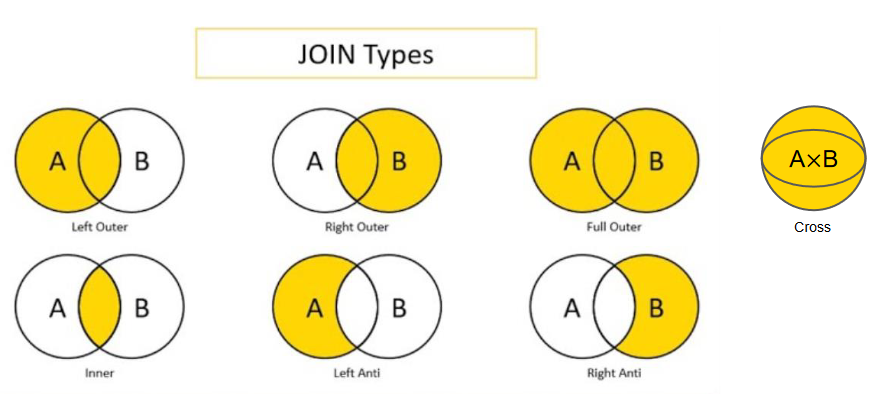

**JOIN Types**:

- Inner Join
```python
# Innter join in pyspark
df_inner = df1.join(df2, on = ['Roll_No'], how = 'inner')
df_inner.show()
```
- Outer Join
```python
# Outer join in pyspark
df_outer = df1.join(df2, on = ['Roll_No'], how = 'outer')
df_outer.show()
```
- Left Join
```python
# Left join in pyspark
df_left = df1.join(df2, on = ['Roll_No'], how = 'left')
df_left.show()
```
- Left Semi Join
```python
# Left Semi join in pyspark
df_left_semi = df1.join(df2, on = ['Roll_No'], how = 'left_semi')
df_left_semi.show()
```
- Left Anti Join
```python
# Left Anti join in pyspark
df_left_anti = df1.join(df2, on = ['Roll_No'], how = 'left_anti')
df_left_anti.show()
```
- Right Join
```python
# Right join in pyspark
df_right = df1.join(df2, on = ['Roll_No'], how = 'right')
df_right.show()
```
- Full Join
```python
# Full join in pyspark
df_full = df1.join(df2, on = ['Roll_No'], how = 'full')
df_full.show()
```

#### PySpark SQL tutorial 1

In [152]:
import pyspark

from pyspark.sql import SparkSession
from pyspark.sql import functions as f

spark = SparkSession.builder.appName("PySparkTutorial").getOrCreate()

In [153]:
ratings = spark.read.csv(path=path+'ratings_small.csv', 
                         sep=',', header=True, quote='"', 
                         schema='userId INT, movieId INT, rating DOUBLE, timestamp INT')

ratings.printSchema()
ratings.show()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
|     1|     70|   3.0|964982400|
|     1|    101|   5.0|964980868|
|     1|    110|   4.0|964982176|
|     1|    151|   5.0|964984041|
|     1|    157|   5.0|964984100|
|     1|    163|   5.0|964983650|
|     1|    216|   5.0|964981208|
|     1|    223|   3.0|964980985|
|     1|    231|   5.0|964981179|
|     1|    235|   4.0|964980908|
|     1|    260|   5.0|964981680|
|     1|    296|   3.0|964982967|
|     1|    316|   3.0|964982310|
|     1|    333|   5.0|964981179|
|     1|    349|   4.0|964982563|
+------+-------+------+---------+
only showing top 20

In [154]:
ratings = spark.read.csv(path=path+'ratings_small.csv', 
                         sep=',', header=True, quote='"', 
                         schema='userId INT, movieId INT, rating DOUBLE, timestamp INT') \
                         .withColumnRenamed('timestamp', 'timestamp_unix') \
                         .withColumn('timestamp', f.to_timestamp(f.from_unixtime('timestamp_unix')))

ratings.printSchema()
ratings.show()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp_unix: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)

+------+-------+------+--------------+-------------------+
|userId|movieId|rating|timestamp_unix|          timestamp|
+------+-------+------+--------------+-------------------+
|     1|      1|   4.0|     964982703|2000-07-30 18:45:03|
|     1|      3|   4.0|     964981247|2000-07-30 18:20:47|
|     1|      6|   4.0|     964982224|2000-07-30 18:37:04|
|     1|     47|   5.0|     964983815|2000-07-30 19:03:35|
|     1|     50|   5.0|     964982931|2000-07-30 18:48:51|
|     1|     70|   3.0|     964982400|2000-07-30 18:40:00|
|     1|    101|   5.0|     964980868|2000-07-30 18:14:28|
|     1|    110|   4.0|     964982176|2000-07-30 18:36:16|
|     1|    151|   5.0|     964984041|2000-07-30 19:07:21|
|     1|    157|   5.0|     964984100|2000-07-30 19:08:20|
|     1|    163|   

In [155]:
# Lets try to drop a column
# it's ok to add some columns which don't exists

ratings.drop('timestamp_unix', 'foobar').show()

+------+-------+------+-------------------+
|userId|movieId|rating|          timestamp|
+------+-------+------+-------------------+
|     1|      1|   4.0|2000-07-30 18:45:03|
|     1|      3|   4.0|2000-07-30 18:20:47|
|     1|      6|   4.0|2000-07-30 18:37:04|
|     1|     47|   5.0|2000-07-30 19:03:35|
|     1|     50|   5.0|2000-07-30 18:48:51|
|     1|     70|   3.0|2000-07-30 18:40:00|
|     1|    101|   5.0|2000-07-30 18:14:28|
|     1|    110|   4.0|2000-07-30 18:36:16|
|     1|    151|   5.0|2000-07-30 19:07:21|
|     1|    157|   5.0|2000-07-30 19:08:20|
|     1|    163|   5.0|2000-07-30 19:00:50|
|     1|    216|   5.0|2000-07-30 18:20:08|
|     1|    223|   3.0|2000-07-30 18:16:25|
|     1|    231|   5.0|2000-07-30 18:19:39|
|     1|    235|   4.0|2000-07-30 18:15:08|
|     1|    260|   5.0|2000-07-30 18:28:00|
|     1|    296|   3.0|2000-07-30 18:49:27|
|     1|    316|   3.0|2000-07-30 18:38:30|
|     1|    333|   5.0|2000-07-30 18:19:39|
|     1|    349|   4.0|2000-07-3

In [156]:
# Count the number of review of each user, sorted by userId
ratings.groupBy('userId').count().sort('userId').show()

+------+-----+
|userId|count|
+------+-----+
|     1|  232|
|     2|   29|
|     3|   39|
|     4|  216|
|     5|   44|
|     6|  314|
|     7|  152|
|     8|   47|
|     9|   46|
|    10|  140|
|    11|   64|
|    12|   32|
|    13|   31|
|    14|   48|
|    15|  135|
|    16|   98|
|    17|  105|
|    18|  502|
|    19|  703|
|    20|  242|
+------+-----+
only showing top 20 rows



In [157]:
# Show min rating of each user
ratings.groupBy('userId').agg(f.min('rating') \
                              .alias('min_rating')).sort('userId').show()

+------+----------+
|userId|min_rating|
+------+----------+
|     1|       1.0|
|     2|       2.0|
|     3|       0.5|
|     4|       1.0|
|     5|       1.0|
|     6|       1.0|
|     7|       0.5|
|     8|       1.0|
|     9|       1.0|
|    10|       0.5|
|    11|       1.0|
|    12|       3.0|
|    13|       1.0|
|    14|       1.0|
|    15|       1.0|
|    16|       1.5|
|    17|       3.0|
|    18|       0.5|
|    19|       1.0|
|    20|       0.5|
+------+----------+
only showing top 20 rows



#### PySpark SQL tutorial 2

In [158]:
import pyspark

from pyspark.sql import SparkSession
from pyspark.sql import functions as f

spark = SparkSession.builder.appName("PySparkTutorial").getOrCreate()

In [159]:
movies = spark.read.csv(path=path+'movies_small.csv', 
                        sep=',', header=True, quote='"', 
                        schema='movieId INT, title STRING, genres STRING')

movies.printSchema()
movies.show(truncate=False)

root
 |-- movieId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)

+-------+-------------------------------------+-------------------------------------------+
|movieId|title                                |genres                                     |
+-------+-------------------------------------+-------------------------------------------+
|1      |Toy Story (1995)                     |Adventure|Animation|Children|Comedy|Fantasy|
|2      |Jumanji (1995)                       |Adventure|Children|Fantasy                 |
|3      |Grumpier Old Men (1995)              |Comedy|Romance                             |
|4      |Waiting to Exhale (1995)             |Comedy|Drama|Romance                       |
|5      |Father of the Bride Part II (1995)   |Comedy                                     |
|6      |Heat (1995)                          |Action|Crime|Thriller                      |
|7      |Sabrina (1995)                       |Come

In [160]:
movies.where(f.col('genres') == 'Action').show(truncate=False)

+-------+-----------------------------------------------------------+------+
|movieId|title                                                      |genres|
+-------+-----------------------------------------------------------+------+
|9      |Sudden Death (1995)                                        |Action|
|71     |Fair Game (1995)                                           |Action|
|204    |Under Siege 2: Dark Territory (1995)                       |Action|
|251    |Hunted, The (1995)                                         |Action|
|667    |Bloodsport 2 (a.k.a. Bloodsport II: The Next Kumite) (1996)|Action|
|1170   |Best of the Best 3: No Turning Back (1995)                 |Action|
|1497   |Double Team (1997)                                         |Action|
|1599   |Steel (1997)                                               |Action|
|2196   |Knock Off (1998)                                           |Action|
|2534   |Avalanche (1978)                                           |Action|

In [161]:
movies.where("genres == 'Action'").show(truncate=False)

+-------+-----------------------------------------------------------+------+
|movieId|title                                                      |genres|
+-------+-----------------------------------------------------------+------+
|9      |Sudden Death (1995)                                        |Action|
|71     |Fair Game (1995)                                           |Action|
|204    |Under Siege 2: Dark Territory (1995)                       |Action|
|251    |Hunted, The (1995)                                         |Action|
|667    |Bloodsport 2 (a.k.a. Bloodsport II: The Next Kumite) (1996)|Action|
|1170   |Best of the Best 3: No Turning Back (1995)                 |Action|
|1497   |Double Team (1997)                                         |Action|
|1599   |Steel (1997)                                               |Action|
|2196   |Knock Off (1998)                                           |Action|
|2534   |Avalanche (1978)                                           |Action|

In [162]:
# Convert genres string to genres array and store to new column
movies.withColumn('genres_array', f.split(f.col('genres'), '\|')).show(truncate=False)

+-------+-------------------------------------+-------------------------------------------+-------------------------------------------------+
|movieId|title                                |genres                                     |genres_array                                     |
+-------+-------------------------------------+-------------------------------------------+-------------------------------------------------+
|1      |Toy Story (1995)                     |Adventure|Animation|Children|Comedy|Fantasy|[Adventure, Animation, Children, Comedy, Fantasy]|
|2      |Jumanji (1995)                       |Adventure|Children|Fantasy                 |[Adventure, Children, Fantasy]                   |
|3      |Grumpier Old Men (1995)              |Comedy|Romance                             |[Comedy, Romance]                                |
|4      |Waiting to Exhale (1995)             |Comedy|Drama|Romance                       |[Comedy, Drama, Romance]                         |
|5    

In [163]:
# Use explode function to get a new row for each element in the genres_array
movies.withColumn('genres_array', f.split(f.col('genres'), '\|')) \
.withColumn('genre', f.explode('genres_array')).show(truncate=False)

+-------+----------------------------------+-------------------------------------------+-------------------------------------------------+---------+
|movieId|title                             |genres                                     |genres_array                                     |genre    |
+-------+----------------------------------+-------------------------------------------+-------------------------------------------------+---------+
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|[Adventure, Animation, Children, Comedy, Fantasy]|Adventure|
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|[Adventure, Animation, Children, Comedy, Fantasy]|Animation|
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|[Adventure, Animation, Children, Comedy, Fantasy]|Children |
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|[Adventure, Animat

In [164]:
# Show final listed genres of each movie
movies.withColumn('genres_array', f.split(f.col('genres'), '\|')) \
.withColumn('last_genre', f.element_at('genres_array', -1)).show(truncate=False)

+-------+-------------------------------------+-------------------------------------------+-------------------------------------------------+----------+
|movieId|title                                |genres                                     |genres_array                                     |last_genre|
+-------+-------------------------------------+-------------------------------------------+-------------------------------------------------+----------+
|1      |Toy Story (1995)                     |Adventure|Animation|Children|Comedy|Fantasy|[Adventure, Animation, Children, Comedy, Fantasy]|Fantasy   |
|2      |Jumanji (1995)                       |Adventure|Children|Fantasy                 |[Adventure, Children, Fantasy]                   |Fantasy   |
|3      |Grumpier Old Men (1995)              |Comedy|Romance                             |[Comedy, Romance]                                |Romance   |
|4      |Waiting to Exhale (1995)             |Comedy|Drama|Romance               

#### PySpark SQL tutorial 3

In [165]:
links = spark.read.csv(path=path+'links_small.csv',
                       sep=',', header=True, quote='"', inferSchema=True,
                       schema='movieId INT, imdbId STRING, tmdbId INT')

links.printSchema()
links.show()

root
 |-- movieId: integer (nullable = true)
 |-- imdbId: string (nullable = true)
 |-- tmdbId: integer (nullable = true)

+-------+-------+------+
|movieId| imdbId|tmdbId|
+-------+-------+------+
|      1|0114709|   862|
|      2|0113497|  8844|
|      3|0113228| 15602|
|      4|0114885| 31357|
|      5|0113041| 11862|
|      6|0113277|   949|
|      7|0114319| 11860|
|      8|0112302| 45325|
|      9|0114576|  9091|
|     10|0113189|   710|
|     11|0112346|  9087|
|     12|0112896| 12110|
|     13|0112453| 21032|
|     14|0113987| 10858|
|     15|0112760|  1408|
|     16|0112641|   524|
|     17|0114388|  4584|
|     18|0113101|     5|
|     19|0112281|  9273|
|     20|0113845| 11517|
+-------+-------+------+
only showing top 20 rows



In [166]:
tags = spark.read.csv(path=path+'tags_small.csv', 
                      sep=',', header=True, quote='"', inferSchema=True,
                      schema='userId INT, movieId INT, tag STRING, timestamp INT') \
                      .withColumn('timestamp', f.to_timestamp(f.from_unixtime('timestamp')))

tags.printSchema()
tags.show()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- tag: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)

+------+-------+-----------------+-------------------+
|userId|movieId|              tag|          timestamp|
+------+-------+-----------------+-------------------+
|     2|  60756|            funny|2015-10-24 19:29:54|
|     2|  60756|  Highly quotable|2015-10-24 19:29:56|
|     2|  60756|     will ferrell|2015-10-24 19:29:52|
|     2|  89774|     Boxing story|2015-10-24 19:33:27|
|     2|  89774|              MMA|2015-10-24 19:33:20|
|     2|  89774|        Tom Hardy|2015-10-24 19:33:25|
|     2| 106782|            drugs|2015-10-24 19:30:54|
|     2| 106782|Leonardo DiCaprio|2015-10-24 19:30:51|
|     2| 106782|  Martin Scorsese|2015-10-24 19:30:56|
|     7|  48516|     way too long|2007-01-25 01:08:45|
|    18|    431|        Al Pacino|2016-05-01 21:39:25|
|    18|    431|         gangster|2016-05-01 21:39:09|
|    18|   

In [167]:
opinions = movies.join(tags, movies['movieId'] == tags['movieId'])
opinions.show()

+-------+--------------------+--------------------+------+-------+----------------+-------------------+
|movieId|               title|              genres|userId|movieId|             tag|          timestamp|
+-------+--------------------+--------------------+------+-------+----------------+-------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|   567|      1|             fun|2018-05-02 18:33:33|
|      1|    Toy Story (1995)|Adventure|Animati...|   474|      1|           pixar|2006-01-14 02:47:05|
|      1|    Toy Story (1995)|Adventure|Animati...|   336|      1|           pixar|2006-02-04 09:36:04|
|      2|      Jumanji (1995)|Adventure|Childre...|   474|      2|            game|2006-01-16 01:39:12|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|      2|  Robin Williams|2018-06-12 22:51:47|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|      2|magic board game|2018-06-12 22:52:12|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|      

In [168]:
# the following command will result in error (two movieId in the dataframe)
# opinions.select('movieId')

# You need to change the code
movies.join(tags, ['movieId'], 'inner').show()

+-------+--------------------+--------------------+------+----------------+-------------------+
|movieId|               title|              genres|userId|             tag|          timestamp|
+-------+--------------------+--------------------+------+----------------+-------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|   567|             fun|2018-05-02 18:33:33|
|      1|    Toy Story (1995)|Adventure|Animati...|   474|           pixar|2006-01-14 02:47:05|
|      1|    Toy Story (1995)|Adventure|Animati...|   336|           pixar|2006-02-04 09:36:04|
|      2|      Jumanji (1995)|Adventure|Childre...|   474|            game|2006-01-16 01:39:12|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|  Robin Williams|2018-06-12 22:51:47|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|magic board game|2018-06-12 22:52:12|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|         fantasy|2018-06-12 22:52:09|
|      3|Grumpier Old Men ...|      Come

In [169]:
# You need to change the code
movies.join(tags, ['movieId'], 'outer').sort('movieId').show()

+-------+--------------------+--------------------+------+----------------+-------------------+
|movieId|               title|              genres|userId|             tag|          timestamp|
+-------+--------------------+--------------------+------+----------------+-------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|   336|           pixar|2006-02-04 09:36:04|
|      1|    Toy Story (1995)|Adventure|Animati...|   474|           pixar|2006-01-14 02:47:05|
|      1|    Toy Story (1995)|Adventure|Animati...|   567|             fun|2018-05-02 18:33:33|
|      2|      Jumanji (1995)|Adventure|Childre...|   474|            game|2006-01-16 01:39:12|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|         fantasy|2018-06-12 22:52:09|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|  Robin Williams|2018-06-12 22:51:47|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|magic board game|2018-06-12 22:52:12|
|      3|Grumpier Old Men ...|      Come

In [170]:
# You need to change the code
movies.join(tags, ['movieId'], 'left').show()

+-------+--------------------+--------------------+------+----------------+-------------------+
|movieId|               title|              genres|userId|             tag|          timestamp|
+-------+--------------------+--------------------+------+----------------+-------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|   567|             fun|2018-05-02 18:33:33|
|      1|    Toy Story (1995)|Adventure|Animati...|   474|           pixar|2006-01-14 02:47:05|
|      1|    Toy Story (1995)|Adventure|Animati...|   336|           pixar|2006-02-04 09:36:04|
|      2|      Jumanji (1995)|Adventure|Childre...|   474|            game|2006-01-16 01:39:12|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|  Robin Williams|2018-06-12 22:51:47|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|magic board game|2018-06-12 22:52:12|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|         fantasy|2018-06-12 22:52:09|
|      3|Grumpier Old Men ...|      Come

In [171]:
# You need to change the code
movies.join(tags, ['movieId'], 'right').sort('movieId').show()

+-------+--------------------+--------------------+------+----------------+-------------------+
|movieId|               title|              genres|userId|             tag|          timestamp|
+-------+--------------------+--------------------+------+----------------+-------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|   567|             fun|2018-05-02 18:33:33|
|      1|    Toy Story (1995)|Adventure|Animati...|   336|           pixar|2006-02-04 09:36:04|
|      1|    Toy Story (1995)|Adventure|Animati...|   474|           pixar|2006-01-14 02:47:05|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|         fantasy|2018-06-12 22:52:09|
|      2|      Jumanji (1995)|Adventure|Childre...|   474|            game|2006-01-16 01:39:12|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|magic board game|2018-06-12 22:52:12|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|  Robin Williams|2018-06-12 22:51:47|
|      3|Grumpier Old Men ...|      Come

In [172]:
movies.join(tags, ['movieId'], 'inner').join(ratings, ['movieId', 'userId']).show()

+-------+------+--------------------+--------------------+----------------+-------------------+------+--------------+-------------------+
|movieId|userId|               title|              genres|             tag|          timestamp|rating|timestamp_unix|          timestamp|
+-------+------+--------------------+--------------------+----------------+-------------------+------+--------------+-------------------+
|      1|   567|    Toy Story (1995)|Adventure|Animati...|             fun|2018-05-02 18:33:33|   3.5|    1525286001|2018-05-02 18:33:21|
|      1|   474|    Toy Story (1995)|Adventure|Animati...|           pixar|2006-01-14 02:47:05|   4.0|     978575760|2001-01-04 02:36:00|
|      1|   336|    Toy Story (1995)|Adventure|Animati...|           pixar|2006-02-04 09:36:04|   4.0|    1122227329|2005-07-24 17:48:49|
|      2|   474|      Jumanji (1995)|Adventure|Childre...|            game|2006-01-16 01:39:12|   3.0|    1046886814|2003-03-05 17:53:34|
|      2|    62|      Jumanji (199

In [173]:
movies.join(tags, ['movieId'], 'inner').withColumnRenamed('timestamp', 'tag_timestamp') \
.join(ratings, ['movieId', 'userId']).show()

+-------+------+--------------------+--------------------+----------------+-------------------+------+--------------+-------------------+
|movieId|userId|               title|              genres|             tag|      tag_timestamp|rating|timestamp_unix|          timestamp|
+-------+------+--------------------+--------------------+----------------+-------------------+------+--------------+-------------------+
|      1|   567|    Toy Story (1995)|Adventure|Animati...|             fun|2018-05-02 18:33:33|   3.5|    1525286001|2018-05-02 18:33:21|
|      1|   474|    Toy Story (1995)|Adventure|Animati...|           pixar|2006-01-14 02:47:05|   4.0|     978575760|2001-01-04 02:36:00|
|      1|   336|    Toy Story (1995)|Adventure|Animati...|           pixar|2006-02-04 09:36:04|   4.0|    1122227329|2005-07-24 17:48:49|
|      2|   474|      Jumanji (1995)|Adventure|Childre...|            game|2006-01-16 01:39:12|   3.0|    1046886814|2003-03-05 17:53:34|
|      2|    62|      Jumanji (199

In [174]:
ratings.groupBy('movieId').agg(f.count('*'),
                               f.min('rating'),
                               f.max('rating'),
                               f.avg('rating'),
                               f.min('timestamp'),
                               f.max('timestamp')).show()

+-------+--------+-----------+-----------+------------------+-------------------+-------------------+
|movieId|count(1)|min(rating)|max(rating)|       avg(rating)|     min(timestamp)|     max(timestamp)|
+-------+--------+-----------+-----------+------------------+-------------------+-------------------+
|   1580|     165|        0.5|        5.0| 3.487878787878788|1997-07-07 12:07:18|2018-07-22 13:30:52|
|   2366|      25|        1.5|        5.0|              3.64|1999-11-04 15:23:49|2018-02-20 10:20:35|
|   3175|      75|        1.0|        5.0|              3.58|1999-12-26 14:01:31|2018-06-25 05:07:19|
|   1088|      42|        1.0|        5.0| 3.369047619047619|1997-04-07 07:36:08|2018-01-17 01:52:47|
|  32460|       4|        3.5|        5.0|              4.25|2011-12-18 19:21:21|2017-04-21 20:12:30|
|  44022|      23|        1.0|        4.5| 3.217391304347826|2006-10-25 18:02:59|2018-03-07 07:38:56|
|  96488|       4|        4.0|        4.5|              4.25|2014-11-08 16:17:07|2

In [175]:
tags.groupBy('movieId').agg(f.collect_set('tag'),
                            f.count('tag'),
                            f.collect_set('userId'),
                            f.count('userId'),
                            f.min('timestamp'),
                            f.max('timestamp')).show()

+-------+--------------------+----------+-------------------+-------------+-------------------+-------------------+
|movieId|    collect_set(tag)|count(tag)|collect_set(userId)|count(userId)|     min(timestamp)|     max(timestamp)|
+-------+--------------------+----------+-------------------+-------------+-------------------+-------------------+
|    471|         [hula hoop]|         1|              [474]|            1|2006-01-16 01:39:07|2006-01-16 01:39:07|
|   1088|      [music, dance]|         2|              [474]|            2|2006-01-26 20:20:56|2006-01-26 20:20:56|
|   1580|            [aliens]|         1|              [474]|            1|2006-01-14 02:25:19|2006-01-14 02:25:19|
|   1645|           [lawyers]|         1|              [474]|            1|2006-01-16 01:14:55|2006-01-16 01:14:55|
|   1959|  [adultery, Africa]|         2|              [474]|            2|2006-01-23 15:58:43|2006-01-23 15:58:43|
|   2122|      [Stephen King]|         1|              [474]|           

## Tài Liệu Tham Khảo

- [RDD functions](https://spark.apache.org/docs/latest/api/python/reference/pyspark.html)
- [Spark SQL](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html)